# Project: Investigating the FBI Gun Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

> The data comes from the FBI's
National Instant Criminal Background
Check System. The NICS is used by to
determine whether a prospective
buyer is eligible to buy firearms or
explosives. Gun shops call into this
system to ensure that each customer
does not have a criminal record or
isn’t otherwise ineligible to make a
purchase. The data has been
supplemented with state level data
from census.gov.
>
>● The NICS data is found in one
sheet of an .xlsx file. It contains
the number of firearm checks by
month, state, and type.
>
>● The U.S. census data is found
in a .csv file. It contains several
variables at the state level. Most
variables just have one data
point per state (2016), but a few
have data for more than one


> **Importing the needed libraries**

In [338]:
import zipfile as zp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

> **Extracting the zipfile and assign each spreadsheet to a dataframe** <font color=green>**(Data Gathering)**</font>

In [339]:
with zp.ZipFile("ncis-and-census-data.zip",'r') as zip_ref:
   zip_ref.extractall()

In [340]:
zip_ref.namelist()

['U.S. Census Data.csv', 'gun_data.xlsx']

In [341]:
files=[i for i in zip_ref.namelist()]
files

['U.S. Census Data.csv', 'gun_data.xlsx']

In [342]:
df_census=pd.read_csv(files[0])
df_census.sample(2)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
54,"Total nonemployer establishments, 2015",NaN,"322,025","55,521","451,951","198,380","3,206,958","480,847","272,809","60,734",...,64006,495703,"2,205,149","216,280","60,312","576,446","444,135","88,136","341,935","48,140"
39,"In civilian labor force, female, percent of po...",NaN,53.00%,65.00%,54.50%,53.30%,57.20%,62.60%,62.80%,59.40%,...,0.646,0.563,57.70%,59.50%,63.60%,60.80%,58.50%,49.20%,63.50%,62.70%


In [343]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
for i in range(len(months)):
    months[i]=months[i].lower()

><font color=red>**The xlrd must be version 1.2.0 using the next commented line or an error will be encountered when reading the excel xlsx file**</font>

In [344]:
#pip install xlrd==1.2.0

In [345]:
df_gun=pd.read_excel(r'{}'.format(files[1]))

In [346]:
df_gun.sample(2)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
7698,2006-02,Wisconsin,0.0,NaN,4472.0,11602.0,NaN,1,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16305
11194,2000-10,Nebraska,1637.0,NaN,29.0,4802.0,NaN,2,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6470


# 
# Data Wrangling Process

<a id='wrangling'></a>




### 1. Data Assessing
> **1.1 Data Assessing: Dataset 1 df_census**

In [347]:
#first dataset exploration
df_census.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [348]:
df_census.shape

(85, 52)

In [349]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

In [350]:
df_census[df_census['Fact Note'].notnull()]

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
12,"White alone, percent, July 1, 2016, (V2016)",(a),69.30%,66.10%,83.30%,79.40%,72.70%,87.50%,80.60%,70.10%,...,0.852,0.787,79.40%,91.10%,94.60%,70.00%,80.00%,93.60%,87.50%,92.80%
13,"Black or African American alone, percent, July...",(a),26.80%,3.80%,4.90%,15.70%,6.50%,4.50%,11.80%,22.60%,...,0.02,0.171,12.60%,1.40%,1.30%,19.80%,4.10%,3.60%,6.60%,1.30%
14,"American Indian and Alaska Native alone, perce...",(a),0.70%,15.20%,5.40%,1.00%,1.70%,1.60%,0.50%,0.60%,...,0.09,0.004,1.00%,1.60%,0.40%,0.50%,1.90%,0.20%,1.10%,2.70%
15,"Asian alone, percent, July 1, 2016, (V2016)",(a),1.40%,6.30%,3.40%,1.60%,14.80%,3.30%,4.70%,4.00%,...,0.015,0.018,4.80%,2.50%,1.80%,6.60%,8.60%,0.80%,2.80%,1.00%
16,Native Hawaiian and Other Pacific Islander alo...,(a),0.10%,1.30%,0.30%,0.30%,0.50%,0.20%,0.10%,0.10%,...,0.001,0.001,0.10%,1.00%,Z,0.10%,0.80%,Z,0.10%,0.10%
18,"Hispanic or Latino, percent, July 1, 2016, (V...",(b),4.20%,7.00%,30.90%,7.30%,38.90%,21.30%,15.70%,9.20%,...,0.037,0.052,39.10%,13.80%,1.90%,9.10%,12.40%,1.50%,6.70%,10.00%
40,"Total accommodation and food services sales, 2...",(c),"7,576,462","2,221,335","13,996,635","4,307,264","90,830,372","13,617,654","9,542,068","2,148,437",...,1873699,12499013,"54,480,811","4,789,281","1,564,272","17,795,901","14,297,278","4,036,333","10,303,256","1,644,844"
41,Total health care and social assistance receip...,(c),"26,039,632","6,375,483","37,055,881","15,792,628","248,953,592","29,488,161","29,573,119","7,003,251",...,6211731,42383683,"145,035,130","14,521,857","4,457,996","47,705,003","43,966,889","12,259,395","40,680,625","3,291,478"
42,"Total manufacturers shipments, 2012 ($1,000)",(c),"124,809,759",D,"51,243,473","62,712,925","512,303,164","50,447,098","55,160,095","22,597,384",...,16882647,139960482,"702,603,073","50,046,429","9,315,494","96,389,872","131,530,601","24,553,072","177,728,926","10,783,794"
43,"Total merchant wholesaler sales, 2012 ($1,000)",(c),"57,746,565","5,216,303","69,437,272","31,256,110","666,652,186","77,034,971","161,962,244","5,628,914",...,20411059,111718421,"691,242,607","30,927,885","6,450,076","86,613,641","83,313,366","14,295,437","77,066,883","5,597,891"


In [351]:
df_census.iloc[13]

Fact              Black or African American alone, percent, July...
Fact Note                                                       (a)
Alabama                                                      26.80%
Alaska                                                        3.80%
Arizona                                                       4.90%
Arkansas                                                     15.70%
California                                                    6.50%
Colorado                                                      4.50%
Connecticut                                                  11.80%
Delaware                                                     22.60%
Florida                                                      16.80%
Georgia                                                      32.00%
Hawaii                                                        2.20%
Idaho                                                         0.80%
Illinois                                        

In [352]:
df_census['Fact Note'].value_counts()

(c)                                                                                                                                                                                                                                            6
Includes data not distributed by county.                                                                                                                                                                                                       5
(a)                                                                                                                                                                                                                                            5
Value greater than zero but less than half unit of measure shown                                                                                                                                                                               1
Fewer than 25 firms                 

In [353]:
mask1=df_census[df_census['Fact'].notnull()]
mask1[mask1['Fact'].str.contains('2016')]['Fact'].value_counts()

Persons under 18 years, percent, July 1, 2016,  (V2016)                                  1
Housing units,  July 1, 2016,  (V2016)                                                   1
Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)        1
Building permits, 2016                                                                   1
White alone, percent, July 1, 2016,  (V2016)                                             1
Persons 65 years and over, percent,  July 1, 2016,  (V2016)                              1
Female persons, percent,  July 1, 2016,  (V2016)                                         1
Population estimates, July 1, 2016,  (V2016)                                             1
Two or More Races, percent, July 1, 2016,  (V2016)                                       1
Black or African American alone, percent, July 1, 2016,  (V2016)                         1
Persons under 5 years, percent, July 1, 2016,  (V2016)                                   1

In [354]:
mask1[mask1['Fact Note'].notnull()]


,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
12,"White alone, percent, July 1, 2016, (V2016)",(a),69.30%,66.10%,83.30%,79.40%,72.70%,87.50%,80.60%,70.10%,...,0.852,0.787,79.40%,91.10%,94.60%,70.00%,80.00%,93.60%,87.50%,92.80%
13,"Black or African American alone, percent, July...",(a),26.80%,3.80%,4.90%,15.70%,6.50%,4.50%,11.80%,22.60%,...,0.02,0.171,12.60%,1.40%,1.30%,19.80%,4.10%,3.60%,6.60%,1.30%
14,"American Indian and Alaska Native alone, perce...",(a),0.70%,15.20%,5.40%,1.00%,1.70%,1.60%,0.50%,0.60%,...,0.09,0.004,1.00%,1.60%,0.40%,0.50%,1.90%,0.20%,1.10%,2.70%
15,"Asian alone, percent, July 1, 2016, (V2016)",(a),1.40%,6.30%,3.40%,1.60%,14.80%,3.30%,4.70%,4.00%,...,0.015,0.018,4.80%,2.50%,1.80%,6.60%,8.60%,0.80%,2.80%,1.00%
16,Native Hawaiian and Other Pacific Islander alo...,(a),0.10%,1.30%,0.30%,0.30%,0.50%,0.20%,0.10%,0.10%,...,0.001,0.001,0.10%,1.00%,Z,0.10%,0.80%,Z,0.10%,0.10%
18,"Hispanic or Latino, percent, July 1, 2016, (V...",(b),4.20%,7.00%,30.90%,7.30%,38.90%,21.30%,15.70%,9.20%,...,0.037,0.052,39.10%,13.80%,1.90%,9.10%,12.40%,1.50%,6.70%,10.00%
40,"Total accommodation and food services sales, 2...",(c),"7,576,462","2,221,335","13,996,635","4,307,264","90,830,372","13,617,654","9,542,068","2,148,437",...,1873699,12499013,"54,480,811","4,789,281","1,564,272","17,795,901","14,297,278","4,036,333","10,303,256","1,644,844"
41,Total health care and social assistance receip...,(c),"26,039,632","6,375,483","37,055,881","15,792,628","248,953,592","29,488,161","29,573,119","7,003,251",...,6211731,42383683,"145,035,130","14,521,857","4,457,996","47,705,003","43,966,889","12,259,395","40,680,625","3,291,478"
42,"Total manufacturers shipments, 2012 ($1,000)",(c),"124,809,759",D,"51,243,473","62,712,925","512,303,164","50,447,098","55,160,095","22,597,384",...,16882647,139960482,"702,603,073","50,046,429","9,315,494","96,389,872","131,530,601","24,553,072","177,728,926","10,783,794"
43,"Total merchant wholesaler sales, 2012 ($1,000)",(c),"57,746,565","5,216,303","69,437,272","31,256,110","666,652,186","77,034,971","161,962,244","5,628,914",...,20411059,111718421,"691,242,607","30,927,885","6,450,076","86,613,641","83,313,366","14,295,437","77,066,883","5,597,891"


> **1.2 Data Assessing: Dataset 2 df_gun**

In [355]:
df_gun

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12480,1998-11,Virginia,0.0,NaN,14.0,2.0,NaN,8,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
12481,1998-11,Washington,1.0,NaN,65.0,286.0,NaN,8,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361
12482,1998-11,West Virginia,3.0,NaN,149.0,251.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408
12483,1998-11,Wisconsin,0.0,NaN,25.0,214.0,NaN,2,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241


In [356]:
df_gun.shape

(12485, 27)

In [357]:
df_gun.columns

Index(['month', 'state', 'permit', 'permit_recheck', 'handgun', 'long_gun',
       'other', 'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other', 'totals'],
      dtype='object')

>> **Some of the columns need to be checked (from prepawn_handgun to returned_other)**

In [358]:
#Enumerate in order to find the equivalent position prepawn_handgun and returned_other
for count,value in enumerate(df_gun.columns):
    print(count,value)

0 month
1 state
2 permit
3 permit_recheck
4 handgun
5 long_gun
6 other
7 multiple
8 admin
9 prepawn_handgun
10 prepawn_long_gun
11 prepawn_other
12 redemption_handgun
13 redemption_long_gun
14 redemption_other
15 returned_handgun
16 returned_long_gun
17 returned_other
18 rentals_handgun
19 rentals_long_gun
20 private_sale_handgun
21 private_sale_long_gun
22 private_sale_other
23 return_to_seller_handgun
24 return_to_seller_long_gun
25 return_to_seller_other
26 totals


In [359]:
df_gun.iloc[:,9+1:17]

,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun
0,21.0,2.0,1378.0,1262.0,1.0,0.0,0.0
1,2.0,0.0,200.0,154.0,2.0,28.0,30.0
2,6.0,0.0,1474.0,748.0,3.0,82.0,5.0
3,13.0,0.0,1296.0,1824.0,4.0,0.0,0.0
4,0.0,0.0,535.0,397.0,5.0,0.0,0.0
...,...,...,...,...,...,...,...
12480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12481,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12482,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12483,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [360]:
df_gun.totals.notnull().value_counts()

True    12485
Name: totals, dtype: int64

In [361]:
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [362]:
df_gun.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


In [363]:
df_gun.sort_values(by='month')

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
12484,1998-11,Wyoming,8.0,NaN,45.0,49.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107
12453,1998-11,Massachusetts,0.0,NaN,4.0,39.0,NaN,0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43
12452,1998-11,Maryland,59.0,NaN,82.0,177.0,NaN,0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,318
12451,1998-11,Mariana Islands,0.0,NaN,0.0,0.0,NaN,0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
12450,1998-11,Maine,0.0,NaN,54.0,41.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,2017-09,New Hampshire,2795.0,0.0,4410.0,3248.0,132.0,3,2.0,0.0,...,1.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,10689
30,2017-09,Nevada,1952.0,0.0,3992.0,2509.0,251.0,237,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9460
29,2017-09,Nebraska,3036.0,113.0,110.0,1989.0,11.0,4,0.0,0.0,...,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,5345
27,2017-09,Missouri,791.0,0.0,16993.0,14395.0,1050.0,991,0.0,12.0,...,0.0,0.0,0.0,75.0,66.0,3.0,1.0,3.0,0.0,37571


> **1.3 Data Assessing: Observations**
>> **1.3.1. Dataset 1 df_census**
>>
>>> 1.there are rows containing all NaNs in each state such as index 72,81(fact not available),82 etc.
>>>
>>> 2.rows from fact note that containing Not Available
>>>
>>> 3.some index of specific columns data are not in percentage such as south dakota etc. , index 13 and others besides the data columns that contains ',' needs to be replaced ',' with '' , dollar sign
>>>
>>> 4.some fact notes are including 'not applicable','either few samples or'
>>>
>>> 5.some index of the 'Fact' column need to be dropped since they are not giving information in any state. (almost like the first and second quality issues of this data)
>>>
>>> 6.each white space in each column needs to be replaced with under score _
>>>
>>> 7.extract the year and the month and drop rows containing population estimation 2010 and percentage 2010
>>>
>> **1.3.2. Dataset 1 df_gun**
>>
>>> 1.extract the year and the month
>>>
>> **1.3.3. Tidiness Issues**
>>
>>> 1.need to match both of the timestamp(same years & months) in each data into month and year in order to combine dfs in next step
>>>
>>> 2.need to combine the both datasets.
>>> 

### 2. Data Cleaning (Define - Code - Test)
> **2.1 Data Cleaning: Dataset 1 df_census**

##### Define: (1. & 2. & 4.& 5.) These problem are common and can be dropped by dropping all states containing full NaNs

##### Code

In [364]:
#1. Drop the rows containing all NaNs in columns
tmp1=df_census.copy()
tmp1.shape

(85, 52)

In [365]:
for value,count in enumerate(tmp1.columns):
    print(value,count)

0 Fact
1 Fact Note
2 Alabama
3 Alaska
4 Arizona
5 Arkansas
6 California
7 Colorado
8 Connecticut
9 Delaware
10 Florida
11 Georgia
12 Hawaii
13 Idaho
14 Illinois
15 Indiana
16 Iowa
17 Kansas
18 Kentucky
19 Louisiana
20 Maine
21 Maryland
22 Massachusetts
23 Michigan
24 Minnesota
25 Mississippi
26 Missouri
27 Montana
28 Nebraska
29 Nevada
30 New Hampshire
31 New Jersey
32 New Mexico
33 New York
34 North Carolina
35 North Dakota
36 Ohio
37 Oklahoma
38 Oregon
39 Pennsylvania
40 Rhode Island
41 South Carolina
42 South Dakota
43 Tennessee
44 Texas
45 Utah
46 Vermont
47 Virginia
48 Washington
49 West Virginia
50 Wisconsin
51 Wyoming


In [366]:
for i,j in tmp1.iterrows():
    if j.isnull().all() == True:
        tmp1.drop(index=i,axis=0,inplace=True)
        print(i)
tmp1.shape        

65
67
70
75


(81, 52)

In [367]:
tmp1.drop(index=tmp1[tmp1['Fact Note']=='Not available'].index,inplace=True)

In [368]:
tmp1.drop(index=tmp1[tmp1['Fact Note']=='Not applicable'].index,inplace=True)

In [369]:
tmp1.drop(index=tmp1[tmp1['Fact Note']=='Suppressed; does not meet publication standards'].index,inplace=True)

In [370]:
#Either few samples were observed
tmp1.drop(index=77,inplace=True)

In [371]:
tmp1.drop(index=[76,78,79,80,84],inplace=True)

In [372]:
mask1=tmp1.iloc[:,2:]

In [373]:
for count,value in mask1.iterrows():
    if value.isnull().all()==True:
        tmp1.drop(index=count,inplace=True)

##### Test

In [374]:
test1=[]
test2=[]
for count,value in tmp1.iterrows():
    if value.isnull().all==True:
        test1.append(True)          
for count,value in mask1.iterrows():
    if value.isnull().all==True:
        test1.append(True)  
assert test1==test2 and test1==[]

##### Define 3.some index of specific columns data are not in percentage such as south dakota etc. , index 13 and others. besides the data columns that contains ',' needs to be replaced ',' with '' and dollar sign with ''

##### Code

In [375]:
rows_containing_percentage=[]
for count,value in tmp1.iterrows():
    if value.str.contains('%').any()==True:
        rows_containing_percentage.append(count)
    

In [376]:
mask1=tmp1.iloc[:,2:]

In [377]:
mask2=mask1.iloc[rows_containing_percentage]

In [378]:
mask3=mask2.copy()

In [379]:
mask2

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
2,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,6.40%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
4,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,6.40%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
5,6.40%,7.60%,7.10%,6.80%,6.80%,6.80%,5.70%,6.20%,5.70%,7.10%,...,0.073,0.064,7.70%,9.50%,5.10%,6.40%,6.50%,5.60%,6.30%,7.10%
6,22.60%,25.20%,23.50%,23.60%,23.20%,22.80%,21.10%,21.50%,20.10%,24.40%,...,0.246,0.226,26.20%,30.20%,19.00%,22.20%,22.40%,20.50%,22.30%,23.70%
7,23.70%,26.40%,25.50%,24.40%,25.00%,24.40%,22.90%,22.90%,21.30%,25.70%,...,0.249,0.236,27.30%,31.50%,20.70%,23.20%,23.50%,20.90%,23.60%,24.00%
8,16.10%,10.40%,16.90%,16.30%,13.60%,13.40%,16.10%,17.50%,19.90%,13.10%,...,0.16,0.157,12.00%,10.50%,18.10%,14.60%,14.80%,18.80%,16.10%,15.00%
9,13.80%,7.70%,13.80%,14.40%,11.40%,10.90%,14.20%,14.40%,17.30%,10.70%,...,0.143,0.134,10.30%,9.00%,14.60%,12.20%,12.30%,16.00%,13.70%,12.40%
10,51.60%,47.70%,50.30%,50.90%,50.30%,49.70%,51.20%,51.60%,51.10%,51.30%,...,0.496,0.512,50.40%,49.70%,50.60%,50.80%,50.00%,50.50%,50.30%,48.90%
11,51.50%,48.00%,50.30%,50.90%,50.30%,49.90%,51.30%,51.60%,51.10%,51.20%,...,0.5,0.513,50.40%,49.80%,50.70%,50.90%,50.20%,50.70%,50.40%,49.00%
12,69.30%,66.10%,83.30%,79.40%,72.70%,87.50%,80.60%,70.10%,77.60%,61.20%,...,0.852,0.787,79.40%,91.10%,94.60%,70.00%,80.00%,93.60%,87.50%,92.80%


In [380]:
#they must be multipled by 100 before removing the percentage sign %
list_of_states_not_percentage=[]
for i in mask2.columns:
    if mask2[i].str.contains('%').any()==False:
        list_of_states_not_percentage.append(i)
list_of_states_not_percentage       


['New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee']

In [381]:
mask2=mask2[list_of_states_not_percentage].astype(float)                                       

In [382]:
mask2=mask2*100

In [383]:
mask2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 2 to 53
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   New Mexico      29 non-null     float64
 1   New York        29 non-null     float64
 2   North Carolina  29 non-null     float64
 3   North Dakota    29 non-null     float64
 4   Ohio            29 non-null     float64
 5   Oklahoma        29 non-null     float64
 6   Oregon          29 non-null     float64
 7   Pennsylvania    29 non-null     float64
 8   Rhode Island    29 non-null     float64
 9   South Carolina  29 non-null     float64
 10  South Dakota    29 non-null     float64
 11  Tennessee       29 non-null     float64
dtypes: float64(12)
memory usage: 2.9 KB


In [384]:
mask2.shape

(29, 12)

In [385]:
mask3.update(mask2)

In [386]:
mask33=mask3.astype(str)

In [387]:
for i in mask33.columns:
    mask33[i]=mask33[i].str.replace('%','').str.extract(r'(\d+.\d+)').astype(float)

In [388]:
percentages_mask=mask33.copy()

In [389]:
#updating tmp1 by mask2
tmp1.update(percentages_mask)
tmp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65 entries, 0 to 64
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            65 non-null     object
 1   Fact Note       16 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

In [390]:
tmp1

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.7,4.5,8.4,2.5,5.4,10.2,0.1,6,...,6.3,4.8,10.8,10.4,0.2,5.1,8.4,1.2,1.6,3.9
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6,7.3,6.3,6.4,6.3,6.1,5.2,5.8,...,7.1,6.1,7.2,8.3,4.9,6.1,6.2,5.5,5.8,6.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,"Veteran-owned firms, 2012",NaN,"41,943","7,953","46,780","25,915","252,377","51,722","31,056","7,206",...,8604,59379,"213,590","18,754","8,237","76,434","49,331","12,912","39,830","6,470"
61,"Nonveteran-owned firms, 2012",NaN,"316,984","56,091","427,582","192,988","3,176,341","469,524","281,182","60,318",...,66219,469392,"2,057,218","219,807","63,317","548,439","461,401","94,960","370,755","51,353"
62,"Population per square mile, 2010",NaN,94.4,1.2,56.3,56,239.1,48.5,738.1,460.8,...,10.7,153.9,96.3,33.6,67.9,202.6,101.2,77.1,105,5.8
63,"Land area in square miles, 2010",NaN,"50,645.33","570,640.95","113,594.08","52,035.48","155,779.22","103,641.89","4,842.36","1,948.54",...,75811,41234.9,"261,231.71","82,169.62","9,216.66","39,490.09","66,455.52","24,038.21","54,157.80","97,093.14"


In [391]:
mask1=tmp1.copy()

In [392]:
for i in mask1.columns:
    mask1[i]=mask1[i].astype(str)

In [393]:
#remove the comma
for count,value in mask1.iterrows():
    for i in mask1.columns:
        if mask1[i].str.contains(',').any():
            mask1[i]=mask1[i].str.replace(',','')

In [394]:
mask1

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,Population estimates July 1 2016 (V2016),nan,4863300,741894,6931071,2988248,39250017,5540545,3576452,952065,...,865454,6651194,27862596,3051217,624594,8411808,7288000,1831102,5778708,585501
1,Population estimates base April 1 2010 (V2016),nan,4780131,710249,6392301,2916025,37254522,5029324,3574114,897936,...,814195,6346298,25146100,2763888,625741,8001041,6724545,1853011,5687289,563767
2,Population percent change - April 1 2010 (esti...,nan,1.7,4.5,8.4,2.5,5.4,10.2,0.1,6.0,...,6.3,4.8,10.8,10.4,0.2,5.1,8.4,1.2,1.6,3.9
3,Population Census April 1 2010,nan,4779736,710231,6392017,2915918,37253956,5029196,3574097,897934,...,814180,6346105,25145561,2763885,625741,8001024,6724540,1852994,5686986,563626
4,Persons under 5 years percent July 1 2016 (V2...,nan,6.0,7.3,6.3,6.4,6.3,6.1,5.2,5.8,...,7.1,6.1,7.2,8.3,4.9,6.1,6.2,5.5,5.8,6.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Veteran-owned firms 2012,nan,41943,7953,46780,25915,252377,51722,31056,7206,...,8604,59379,213590,18754,8237,76434,49331,12912,39830,6470
61,Nonveteran-owned firms 2012,nan,316984,56091,427582,192988,3176341,469524,281182,60318,...,66219,469392,2057218,219807,63317,548439,461401,94960,370755,51353
62,Population per square mile 2010,nan,94.4,1.2,56.3,56,239.1,48.5,738.1,460.8,...,10.7,153.9,96.3,33.6,67.9,202.6,101.2,77.1,105,5.8
63,Land area in square miles 2010,nan,50645.33,570640.95,113594.08,52035.48,155779.22,103641.89,4842.36,1948.54,...,75811,41234.9,261231.71,82169.62,9216.66,39490.09,66455.52,24038.21,54157.80,97093.14


In [395]:
mask11=mask1.copy()
mask11=mask11.iloc[:,2:]
#error encountered while changing type of data to Float says that there is a dollar sign ($125500 cannot be converted)
mask11[mask11=='$125500 '].nunique()
#found at Alabama and now we want to find the index of it at which row
for i,j in enumerate(mask11['Alabama']):
    if j=='$125500 ':
        print(i,j)
    #mask11=mask11[i].astype(float)

25 $125500 


In [396]:
mask11.iloc[25]
mask11.iloc[25].str.replace('$','').str.strip()

Alabama           125500
Alaska            250000
Arizona           167500
Arkansas          111400
California        385500
Colorado          247800
Connecticut       270500
Delaware          231500
Florida           159000
Georgia           148100
Hawaii            515300
Idaho             162900
Illinois          173800
Indiana           124200
Iowa              129200
Kansas            132000
Kentucky          123200
Louisiana         144100
Maine             173800
Maryland          286900
Massachusetts     333100
Michigan          122400
Minnesota         186200
Mississippi       103100
Missouri          138400
Montana           193500
Nebraska          133200
Nevada            173700
New Hampshire     237300
New Jersey        315900
New Mexico        160300
New York          283400
North Carolina    154900
North Dakota      153800
Ohio              129900
Oklahoma          117900
Oregon            237300
Pennsylvania      166000
Rhode Island      238000
South Carolina    139900


In [397]:
mask111=mask11.iloc[25].str.replace('$','').str.strip()
mask111
mask11.iloc[25].update(mask111)

In [398]:
mask11.iloc[25]

Alabama           125500
Alaska            250000
Arizona           167500
Arkansas          111400
California        385500
Colorado          247800
Connecticut       270500
Delaware          231500
Florida           159000
Georgia           148100
Hawaii            515300
Idaho             162900
Illinois          173800
Indiana           124200
Iowa              129200
Kansas            132000
Kentucky          123200
Louisiana         144100
Maine             173800
Maryland          286900
Massachusetts     333100
Michigan          122400
Minnesota         186200
Mississippi       103100
Missouri          138400
Montana           193500
Nebraska          133200
Nevada            173700
New Hampshire     237300
New Jersey        315900
New Mexico        160300
New York          283400
North Carolina    154900
North Dakota      153800
Ohio              129900
Oklahoma          117900
Oregon            237300
Pennsylvania      166000
Rhode Island      238000
South Carolina    139900


In [399]:
#row 64 containing a code which is not numeritc it is categorical
#for i in mask11.columns:
    #mask11=mask11[i].astype('float')    

In [400]:
for i,j in enumerate(mask11['Alabama']):
    if j=='$1139 ':
        print(i,j)

26 $1139 


In [401]:
#found at row 26

In [402]:
mask111=mask11.iloc[26].str.replace('$','').str.strip()
mask111
mask11.iloc[26].update(mask111)

In [403]:
mask11.iloc[26]

Alabama           1139
Alaska            1827
Arizona           1343
Arkansas          1019
California        2155
Colorado          1577
Connecticut       2067
Delaware          1537
Florida           1435
Georgia           1346
Hawaii            2270
Idaho             1189
Illinois          1636
Indiana           1102
Iowa              1171
Kansas            1282
Kentucky          1112
Louisiana         1200
Maine             1336
Maryland          1951
Massachusetts     2063
Michigan          1257
Minnesota         1490
Mississippi       1077
Missouri          1210
Montana           1294
Nebraska          1270
Nevada            1442
New Hampshire     1870
New Jersey        2386
New Mexico        1227
New York          2022
North Carolina    1248
North Dakota      1243
Ohio              1246
Oklahoma          1147
Oregon            1557
Pennsylvania      1425
Rhode Island      1815
South Carolina    1183
South Dakota      1210
Tennessee         1181
Texas             1432
Utah       

In [404]:
mask111=mask11.copy()

In [405]:
#for i in mask11.iloc[:,2:].columns:
    #mask11=mask11[i].astype(float)
    

In [406]:
mask11[mask11=='$380 '].nunique()==1

Alabama           False
Alaska            False
Arizona            True
Arkansas          False
California        False
Colorado          False
Connecticut       False
Delaware          False
Florida           False
Georgia           False
Hawaii            False
Idaho             False
Illinois          False
Indiana           False
Iowa              False
Kansas            False
Kentucky          False
Louisiana         False
Maine             False
Maryland          False
Massachusetts     False
Michigan          False
Minnesota         False
Mississippi       False
Missouri          False
Montana           False
Nebraska          False
Nevada            False
New Hampshire     False
New Jersey        False
New Mexico        False
New York          False
North Carolina    False
North Dakota      False
Ohio              False
Oklahoma          False
Oregon            False
Pennsylvania      False
Rhode Island      False
South Carolina    False
South Dakota      False
Tennessee       

In [407]:
for i,j in enumerate(mask11['Arizona']):
    if j=='$380 ':
        print(i,j)

27 $380 


In [408]:
#found at row 27
mask111=mask11.iloc[27].str.replace('$','').str.strip()
mask111
mask11.iloc[27].update(mask111)

In [409]:
mask11.iloc[27]

Alabama           345
Alaska            554
Arizona           380
Arkansas          327
California        500
Colorado          419
Connecticut       833
Delaware          445
Florida           463
Georgia           392
Hawaii            505
Idaho             340
Illinois          574
Indiana           378
Iowa              434
Kansas            455
Kentucky          339
Louisiana         317
Maine             477
Maryland          582
Massachusetts     717
Michigan          461
Minnesota         479
Mississippi       341
Missouri          402
Montana           387
Nebraska          471
Nevada            410
New Hampshire     747
New Jersey        973
New Mexico        327
New York          709
North Carolina    373
North Dakota      423
Ohio              444
Oklahoma          370
Oregon            469
Pennsylvania      498
Rhode Island      682
South Carolina    347
South Dakota      433
Tennessee         359
Texas             460
Utah              388
Vermont           641
Virginia  

In [410]:
#for i in mask11.iloc[:,2:].columns:
    #mask11=mask11[i].astype(float)

In [411]:
mask11.iloc[25:32]

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
25,125500,250000,167500,111400,385500,247800,270500,231500,159000,148100,...,140500,142100,136000,215900,217500,245000,259500,103800,165800,194800
26,1139,1827,1343,1019,2155,1577,2067,1537,1435,1346,...,1210,1181,1432,1428,1535,1711,1731,966,1402,1348
27,345,554,380,327,500,419,833,445,463,392,...,433,359,460,388,641,433,511,293,532,386
28,$717,$1146,$913,$677,$1255,$1002,$1075,$1018,$1002,$879,...,655,764,$882,$887,$895,$1116,$1014,$643,$776,$789
29,15001,1503,35578,9474,102350,38974,5504,5804,116240,51675,...,5686,36157,165853,22662,1771,31132,44077,2544,19274,1727
30,1848325,250969,2412212,1138025,12717801,2024468,1352583,344022,7300494,3574362,...,330858,2504556,9149196,906292,257167,3062783,2668912,740890,2299107,226865
31,2.55,2.81,2.69,2.53,2.96,2.55,2.57,2.62,2.63,2.73,...,2.45,2.53,2.84,3.15,2.34,2.62,2.56,2.43,2.43,2.49


In [412]:
#found at row 28
mask111=mask11.iloc[28].str.replace('$','').str.strip()
mask111
mask11.iloc[28].update(mask111)

In [413]:
mask11.iloc[28]

Alabama            717
Alaska            1146
Arizona            913
Arkansas           677
California        1255
Colorado          1002
Connecticut       1075
Delaware          1018
Florida           1002
Georgia            879
Hawaii            1438
Idaho              743
Illinois           907
Indiana            745
Iowa               697
Kansas             757
Kentucky           675
Louisiana          788
Maine              777
Maryland          1230
Massachusetts     1102
Michigan           783
Minnesota          848
Mississippi        717
Missouri           746
Montana            711
Nebraska           726
Nevada             973
New Hampshire     1000
New Jersey        1192
New Mexico         777
New York          1132
North Carolina     797
North Dakota       709
Ohio               730
Oklahoma           727
Oregon             907
Pennsylvania       840
Rhode Island       925
South Carolina     790
South Dakota       655
Tennessee          764
Texas              882
Utah       

In [414]:
#for i in mask11.iloc[:,2:].columns:
    #mask11=mask11[i].astype(float)

><font color=red>**Alternetavely it can be done iteratively at each row we find if it contains $**</font>

In [415]:
mask111=mask11.copy()

In [416]:
for i in mask11.columns:
    mask11[i]=mask11[i].str.replace('$','')
mask11    

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,4863300,741894,6931071,2988248,39250017,5540545,3576452,952065,20612439,10310371,...,865454,6651194,27862596,3051217,624594,8411808,7288000,1831102,5778708,585501
1,4780131,710249,6392301,2916025,37254522,5029324,3574114,897936,18804592,9688680,...,814195,6346298,25146100,2763888,625741,8001041,6724545,1853011,5687289,563767
2,1.7,4.5,8.4,2.5,5.4,10.2,0.1,6.0,9.6,6.4,...,6.3,4.8,10.8,10.4,0.2,5.1,8.4,1.2,1.6,3.9
3,4779736,710231,6392017,2915918,37253956,5029196,3574097,897934,18801310,9687653,...,814180,6346105,25145561,2763885,625741,8001024,6724540,1852994,5686986,563626
4,6.0,7.3,6.3,6.4,6.3,6.1,5.2,5.8,5.5,6.4,...,7.1,6.1,7.2,8.3,4.9,6.1,6.2,5.5,5.8,6.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,41943,7953,46780,25915,252377,51722,31056,7206,185756,96787,...,8604,59379,213590,18754,8237,76434,49331,12912,39830,6470
61,316984,56091,427582,192988,3176341,469524,281182,60318,1846686,800585,...,66219,469392,2057218,219807,63317,548439,461401,94960,370755,51353
62,94.4,1.2,56.3,56,239.1,48.5,738.1,460.8,350.6,168.4,...,10.7,153.9,96.3,33.6,67.9,202.6,101.2,77.1,105,5.8
63,50645.33,570640.95,113594.08,52035.48,155779.22,103641.89,4842.36,1948.54,53624.76,57513.49,...,75811,41234.9,261231.71,82169.62,9216.66,39490.09,66455.52,24038.21,54157.80,97093.14


In [417]:
mask111=mask11.iloc[0:64,:]

In [418]:
mask111

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,4863300,741894,6931071,2988248,39250017,5540545,3576452,952065,20612439,10310371,...,865454,6651194,27862596,3051217,624594,8411808,7288000,1831102,5778708,585501
1,4780131,710249,6392301,2916025,37254522,5029324,3574114,897936,18804592,9688680,...,814195,6346298,25146100,2763888,625741,8001041,6724545,1853011,5687289,563767
2,1.7,4.5,8.4,2.5,5.4,10.2,0.1,6.0,9.6,6.4,...,6.3,4.8,10.8,10.4,0.2,5.1,8.4,1.2,1.6,3.9
3,4779736,710231,6392017,2915918,37253956,5029196,3574097,897934,18801310,9687653,...,814180,6346105,25145561,2763885,625741,8001024,6724540,1852994,5686986,563626
4,6.0,7.3,6.3,6.4,6.3,6.1,5.2,5.8,5.5,6.4,...,7.1,6.1,7.2,8.3,4.9,6.1,6.2,5.5,5.8,6.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,272651,51147,344981,189029,1819107,442365,259614,54782,1121749,538893,...,74228,434025,1224845,218826,70491,450109,426697,104785,379934,55397
60,41943,7953,46780,25915,252377,51722,31056,7206,185756,96787,...,8604,59379,213590,18754,8237,76434,49331,12912,39830,6470
61,316984,56091,427582,192988,3176341,469524,281182,60318,1846686,800585,...,66219,469392,2057218,219807,63317,548439,461401,94960,370755,51353
62,94.4,1.2,56.3,56,239.1,48.5,738.1,460.8,350.6,168.4,...,10.7,153.9,96.3,33.6,67.9,202.6,101.2,77.1,105,5.8


In [419]:
#for i in mask111.columns:
    #mask111[i]=mask111[i].astype(float)
    

In [420]:
#for i in mask111.columns:
    #mask111[i]=mask111[i].str.extract(r'(\d+.\d+)')

In [421]:
#for i in mask111.columns:
   #mask111[i]=mask111[i].astype(float)
    

In [422]:
mask111.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 0 to 63
Data columns (total 50 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Alabama         64 non-null     object
 1   Alaska          64 non-null     object
 2   Arizona         64 non-null     object
 3   Arkansas        64 non-null     object
 4   California      64 non-null     object
 5   Colorado        64 non-null     object
 6   Connecticut     64 non-null     object
 7   Delaware        64 non-null     object
 8   Florida         64 non-null     object
 9   Georgia         64 non-null     object
 10  Hawaii          64 non-null     object
 11  Idaho           64 non-null     object
 12  Illinois        64 non-null     object
 13  Indiana         64 non-null     object
 14  Iowa            64 non-null     object
 15  Kansas          64 non-null     object
 16  Kentucky        64 non-null     object
 17  Louisiana       64 non-null     object
 18  Maine       

In [423]:
delete_me=mask11.copy()

In [424]:
mask11.update(mask111)

In [425]:
mask11

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,4863300,741894,6931071,2988248,39250017,5540545,3576452,952065,20612439,10310371,...,865454,6651194,27862596,3051217,624594,8411808,7288000,1831102,5778708,585501
1,4780131,710249,6392301,2916025,37254522,5029324,3574114,897936,18804592,9688680,...,814195,6346298,25146100,2763888,625741,8001041,6724545,1853011,5687289,563767
2,1.7,4.5,8.4,2.5,5.4,10.2,0.1,6.0,9.6,6.4,...,6.3,4.8,10.8,10.4,0.2,5.1,8.4,1.2,1.6,3.9
3,4779736,710231,6392017,2915918,37253956,5029196,3574097,897934,18801310,9687653,...,814180,6346105,25145561,2763885,625741,8001024,6724540,1852994,5686986,563626
4,6.0,7.3,6.3,6.4,6.3,6.1,5.2,5.8,5.5,6.4,...,7.1,6.1,7.2,8.3,4.9,6.1,6.2,5.5,5.8,6.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,41943,7953,46780,25915,252377,51722,31056,7206,185756,96787,...,8604,59379,213590,18754,8237,76434,49331,12912,39830,6470
61,316984,56091,427582,192988,3176341,469524,281182,60318,1846686,800585,...,66219,469392,2057218,219807,63317,548439,461401,94960,370755,51353
62,94.4,1.2,56.3,56,239.1,48.5,738.1,460.8,350.6,168.4,...,10.7,153.9,96.3,33.6,67.9,202.6,101.2,77.1,105,5.8
63,50645.33,570640.95,113594.08,52035.48,155779.22,103641.89,4842.36,1948.54,53624.76,57513.49,...,75811,41234.9,261231.71,82169.62,9216.66,39490.09,66455.52,24038.21,54157.80,97093.14


In [426]:
delete_me2=tmp1.copy()

In [427]:
tmp1.update(mask11)

In [428]:
tmp1

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,4863300,741894,6931071,2988248,39250017,5540545,3576452,952065,...,865454,6651194,27862596,3051217,624594,8411808,7288000,1831102,5778708,585501
1,"Population estimates base, April 1, 2010, (V2...",NaN,4780131,710249,6392301,2916025,37254522,5029324,3574114,897936,...,814195,6346298,25146100,2763888,625741,8001041,6724545,1853011,5687289,563767
2,"Population, percent change - April 1, 2010 (es...",NaN,1.7,4.5,8.4,2.5,5.4,10.2,0.1,6.0,...,6.3,4.8,10.8,10.4,0.2,5.1,8.4,1.2,1.6,3.9
3,"Population, Census, April 1, 2010",NaN,4779736,710231,6392017,2915918,37253956,5029196,3574097,897934,...,814180,6346105,25145561,2763885,625741,8001024,6724540,1852994,5686986,563626
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.0,7.3,6.3,6.4,6.3,6.1,5.2,5.8,...,7.1,6.1,7.2,8.3,4.9,6.1,6.2,5.5,5.8,6.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,"Veteran-owned firms, 2012",NaN,41943,7953,46780,25915,252377,51722,31056,7206,...,8604,59379,213590,18754,8237,76434,49331,12912,39830,6470
61,"Nonveteran-owned firms, 2012",NaN,316984,56091,427582,192988,3176341,469524,281182,60318,...,66219,469392,2057218,219807,63317,548439,461401,94960,370755,51353
62,"Population per square mile, 2010",NaN,94.4,1.2,56.3,56,239.1,48.5,738.1,460.8,...,10.7,153.9,96.3,33.6,67.9,202.6,101.2,77.1,105,5.8
63,"Land area in square miles, 2010",NaN,50645.33,570640.95,113594.08,52035.48,155779.22,103641.89,4842.36,1948.54,...,75811,41234.9,261231.71,82169.62,9216.66,39490.09,66455.52,24038.21,54157.80,97093.14


In [429]:
clean_census=tmp1.copy()

# Test by rechecking visually with different samples if the data that wasnt in percentage is multipled by 100 and removed the % , and the dollar sign is removed along with the commas

In [430]:
clean_census.iloc[25:32]

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
25,"Median value of owner-occupied housing units, ...",NaN,125500,250000,167500,111400,385500,247800,270500,231500,...,140500,142100,136000,215900,217500,245000,259500,103800,165800,194800
26,Median selected monthly owner costs -with a mo...,NaN,1139,1827,1343,1019,2155,1577,2067,1537,...,1210,1181,1432,1428,1535,1711,1731,966,1402,1348
27,Median selected monthly owner costs -without a...,NaN,345,554,380,327,500,419,833,445,...,433,359,460,388,641,433,511,293,532,386
28,"Median gross rent, 2011-2015",NaN,717,1146,913,677,1255,1002,1075,1018,...,655,764,882,887,895,1116,1014,643,776,789
29,"Building permits, 2016",NaN,15001,1503,35578,9474,102350,38974,5504,5804,...,5686,36157,165853,22662,1771,31132,44077,2544,19274,1727
30,"Households, 2011-2015",NaN,1848325,250969,2412212,1138025,12717801,2024468,1352583,344022,...,330858,2504556,9149196,906292,257167,3062783,2668912,740890,2299107,226865
31,"Persons per household, 2011-2015",NaN,2.55,2.81,2.69,2.53,2.96,2.55,2.57,2.62,...,2.45,2.53,2.84,3.15,2.34,2.62,2.56,2.43,2.43,2.49


##### Define: 6.each white space in each column needs to be replaced with under score _

##### Code

In [431]:
clean_census.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

##### Test

In [432]:
clean_census.columns

Index(['fact', 'fact_note', 'alabama', 'alaska', 'arizona', 'arkansas',
       'california', 'colorado', 'connecticut', 'delaware', 'florida',
       'georgia', 'hawaii', 'idaho', 'illinois', 'indiana', 'iowa', 'kansas',
       'kentucky', 'louisiana', 'maine', 'maryland', 'massachusetts',
       'michigan', 'minnesota', 'mississippi', 'missouri', 'montana',
       'nebraska', 'nevada', 'new_hampshire', 'new_jersey', 'new_mexico',
       'new_york', 'north_carolina', 'north_dakota', 'ohio', 'oklahoma',
       'oregon', 'pennsylvania', 'rhode_island', 'south_carolina',
       'south_dakota', 'tennessee', 'texas', 'utah', 'vermont', 'virginia',
       'washington', 'west_virginia', 'wisconsin', 'wyoming'],
      dtype='object')

In [433]:
#Remove unwanted temporaries from memory
del(mask1)
del(mask11)
del(tmp1)
del(mask111)

##### Define: 7. extract the wanted year and month from Fact (2016) since the data description says (Most variables just have one data point per state (2016), but a few have data for more than one)

In [434]:
tmp1=clean_census.copy()

In [435]:
tmp1.fact.values

array(['Population estimates, July 1, 2016,  (V2016)',
       'Population estimates base, April 1, 2010,  (V2016)',
       'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
       'Population, Census, April 1, 2010',
       'Persons under 5 years, percent, July 1, 2016,  (V2016)',
       'Persons under 5 years, percent, April 1, 2010',
       'Persons under 18 years, percent, July 1, 2016,  (V2016)',
       'Persons under 18 years, percent, April 1, 2010',
       'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
       'Persons 65 years and over, percent, April 1, 2010',
       'Female persons, percent,  July 1, 2016,  (V2016)',
       'Female persons, percent, April 1, 2010',
       'White alone, percent, July 1, 2016,  (V2016)',
       'Black or African American alone, percent, July 1, 2016,  (V2016)',
       'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
       'Asian alone, percent, July 1, 2016,  (V20

In [436]:
census_16=tmp1[tmp1.fact.str.contains('2016')]

In [437]:
census_16

,fact,fact_note,alabama,alaska,arizona,arkansas,california,colorado,connecticut,delaware,...,south_dakota,tennessee,texas,utah,vermont,virginia,washington,west_virginia,wisconsin,wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,4863300,741894,6931071,2988248,39250017,5540545,3576452,952065,...,865454,6651194,27862596,3051217,624594,8411808,7288000,1831102,5778708,585501
1,"Population estimates base, April 1, 2010, (V2...",NaN,4780131,710249,6392301,2916025,37254522,5029324,3574114,897936,...,814195,6346298,25146100,2763888,625741,8001041,6724545,1853011,5687289,563767
2,"Population, percent change - April 1, 2010 (es...",NaN,1.7,4.5,8.4,2.5,5.4,10.2,0.1,6.0,...,6.3,4.8,10.8,10.4,0.2,5.1,8.4,1.2,1.6,3.9
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.0,7.3,6.3,6.4,6.3,6.1,5.2,5.8,...,7.1,6.1,7.2,8.3,4.9,6.1,6.2,5.5,5.8,6.5
6,"Persons under 18 years, percent, July 1, 2016,...",NaN,22.6,25.2,23.5,23.6,23.2,22.8,21.1,21.5,...,24.6,22.6,26.2,30.2,19.0,22.2,22.4,20.5,22.3,23.7
8,"Persons 65 years and over, percent, July 1, 2...",NaN,16.1,10.4,16.9,16.3,13.6,13.4,16.1,17.5,...,16.0,15.7,12.0,10.5,18.1,14.6,14.8,18.8,16.1,15.0
10,"Female persons, percent, July 1, 2016, (V2016)",NaN,51.6,47.7,50.3,50.9,50.3,49.7,51.2,51.6,...,49.6,51.2,50.4,49.7,50.6,50.8,50.0,50.5,50.3,48.9
12,"White alone, percent, July 1, 2016, (V2016)",(a),69.3,66.1,83.3,79.4,72.7,87.5,80.6,70.1,...,85.2,78.7,79.4,91.1,94.6,70.0,80.0,93.6,87.5,92.8
13,"Black or African American alone, percent, July...",(a),26.8,3.8,4.9,15.7,6.5,4.5,11.8,22.6,...,2.0,17.1,12.6,1.4,1.3,19.8,4.1,3.6,6.6,1.3
14,"American Indian and Alaska Native alone, perce...",(a),0.7,15.2,5.4,1.0,1.7,1.6,0.5,0.6,...,9.0,0.4,1.0,1.6,0.4,0.5,1.9,0.2,1.1,2.7


# Conversion to float

In [438]:
for i in census_16.iloc[:,2:].columns:
    census_16[i]=census_16[i].str.extract(r'(\d+.\d+)')

D:\Users\LUPO\anaconda3\envs\data_analysis\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [439]:
for i in census_16.iloc[:,2:].columns:
    census_16[i]=census_16[i].astype(float)

D:\Users\LUPO\anaconda3\envs\data_analysis\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [440]:
census_16.head()

,fact,fact_note,alabama,alaska,arizona,arkansas,california,colorado,connecticut,delaware,...,south_dakota,tennessee,texas,utah,vermont,virginia,washington,west_virginia,wisconsin,wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,4863300.0,741894.0,6931071.0,2988248.0,39250017.0,5540545.0,3576452.0,952065.0,...,865454.0,6651194.0,27862596.0,3051217.0,624594.0,8411808.0,7288000.0,1831102.0,5778708.0,585501.0
1,"Population estimates base, April 1, 2010, (V2...",NaN,4780131.0,710249.0,6392301.0,2916025.0,37254522.0,5029324.0,3574114.0,897936.0,...,814195.0,6346298.0,25146100.0,2763888.0,625741.0,8001041.0,6724545.0,1853011.0,5687289.0,563767.0
2,"Population, percent change - April 1, 2010 (es...",NaN,1.7,4.5,8.4,2.5,5.4,10.2,0.1,6.0,...,6.3,4.8,10.8,10.4,0.2,5.1,8.4,1.2,1.6,3.9
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.0,7.3,6.3,6.4,6.3,6.1,5.2,5.8,...,7.1,6.1,7.2,8.3,4.9,6.1,6.2,5.5,5.8,6.5
6,"Persons under 18 years, percent, July 1, 2016,...",NaN,22.6,25.2,23.5,23.6,23.2,22.8,21.1,21.5,...,24.6,22.6,26.2,30.2,19.0,22.2,22.4,20.5,22.3,23.7


In [441]:
census_16.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 0 to 29
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fact            17 non-null     object 
 1   fact_note       6 non-null      object 
 2   alabama         17 non-null     float64
 3   alaska          17 non-null     float64
 4   arizona         17 non-null     float64
 5   arkansas        17 non-null     float64
 6   california      17 non-null     float64
 7   colorado        17 non-null     float64
 8   connecticut     17 non-null     float64
 9   delaware        17 non-null     float64
 10  florida         17 non-null     float64
 11  georgia         17 non-null     float64
 12  hawaii          17 non-null     float64
 13  idaho           17 non-null     float64
 14  illinois        17 non-null     float64
 15  indiana         17 non-null     float64
 16  iowa            17 non-null     float64
 17  kansas          17 non-null     float

##### 7.Define: Need to extract the month from fact which is a string using the months variabe defined before. also drop the 2010 estimations

##### Code

In [442]:
census_16.fact.value_counts()

Persons under 18 years, percent, July 1, 2016,  (V2016)                                  1
Housing units,  July 1, 2016,  (V2016)                                                   1
Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)        1
Building permits, 2016                                                                   1
White alone, percent, July 1, 2016,  (V2016)                                             1
Persons 65 years and over, percent,  July 1, 2016,  (V2016)                              1
Female persons, percent,  July 1, 2016,  (V2016)                                         1
Population estimates, July 1, 2016,  (V2016)                                             1
Two or More Races, percent, July 1, 2016,  (V2016)                                       1
Black or African American alone, percent, July 1, 2016,  (V2016)                         1
Persons under 5 years, percent, July 1, 2016,  (V2016)                                   1

In [443]:
census_16[census_16.fact.str.contains('Population')]

,fact,fact_note,alabama,alaska,arizona,arkansas,california,colorado,connecticut,delaware,...,south_dakota,tennessee,texas,utah,vermont,virginia,washington,west_virginia,wisconsin,wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,4863300.0,741894.0,6931071.0,2988248.0,39250017.0,5540545.0,3576452.0,952065.0,...,865454.0,6651194.0,27862596.0,3051217.0,624594.0,8411808.0,7288000.0,1831102.0,5778708.0,585501.0
1,"Population estimates base, April 1, 2010, (V2...",NaN,4780131.0,710249.0,6392301.0,2916025.0,37254522.0,5029324.0,3574114.0,897936.0,...,814195.0,6346298.0,25146100.0,2763888.0,625741.0,8001041.0,6724545.0,1853011.0,5687289.0,563767.0
2,"Population, percent change - April 1, 2010 (es...",NaN,1.7,4.5,8.4,2.5,5.4,10.2,0.1,6.0,...,6.3,4.8,10.8,10.4,0.2,5.1,8.4,1.2,1.6,3.9


In [444]:
census_16=census_16[census_16.fact.str.contains('2010')==False]

In [445]:
assert census_16.fact.str.contains('2010').any()==False

#### Now we move on to the month extraction

In [446]:
census_16.fact=census_16.fact.astype(str)

D:\Users\LUPO\anaconda3\envs\data_analysis\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [447]:
census_16.fact=census_16.fact.str.lower()

In [448]:
tmpcol=[]
for i in months:
    tmpcol.append(census_16.fact.str.contains(i)==True)
tmpcol
#month 7 is true (all data are from month 7)

[0     False
 4     False
 6     False
 8     False
 10    False
 12    False
 13    False
 14    False
 15    False
 16    False
 17    False
 18    False
 19    False
 22    False
 29    False
 Name: fact, dtype: bool,
 0     False
 4     False
 6     False
 8     False
 10    False
 12    False
 13    False
 14    False
 15    False
 16    False
 17    False
 18    False
 19    False
 22    False
 29    False
 Name: fact, dtype: bool,
 0     False
 4     False
 6     False
 8     False
 10    False
 12    False
 13    False
 14    False
 15    False
 16    False
 17    False
 18    False
 19    False
 22    False
 29    False
 Name: fact, dtype: bool,
 0     False
 4     False
 6     False
 8     False
 10    False
 12    False
 13    False
 14    False
 15    False
 16    False
 17    False
 18    False
 19    False
 22    False
 29    False
 Name: fact, dtype: bool,
 0     False
 4     False
 6     False
 8     False
 10    False
 12    False
 13    False
 14    False
 15    False

In [449]:
census_16.fact.str.contains('july')

0      True
4      True
6      True
8      True
10     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
22     True
29    False
Name: fact, dtype: bool

> **2.2 Data Cleaning: Dataset 2 df_gun**

In [450]:
tmp=df_gun.copy()

##### Define: 1.Need to extract the year and month of 2016 since it is to be combined with the census data

In [451]:
gun_16=tmp[tmp.month.str.contains('2016')]

In [452]:
gun_16.month=pd.to_datetime(gun_16.month)

D:\Users\LUPO\anaconda3\envs\data_analysis\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [453]:
gun_16.month=gun_16.month.dt.month

In [454]:
gun_16

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
495,12,Alabama,26996.0,0.0,13733.0,17519.0,376.0,533,0.0,10.0,...,0.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,62014
496,12,Alaska,254.0,0.0,4087.0,3698.0,243.0,191,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8786
497,12,Arizona,8900.0,121.0,18024.0,13785.0,1180.0,703,0.0,10.0,...,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,44887
498,12,Arkansas,3294.0,692.0,9192.0,13433.0,277.0,385,37.0,4.0,...,0.0,0.0,0.0,2.0,7.0,0.0,0.0,0.0,0.0,29926
499,12,California,61808.0,0.0,63649.0,93224.0,77929.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,298161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150,1,Virginia,524.0,NaN,27033.0,15699.0,922.0,0,0.0,0.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,44181
1151,1,Washington,19688.0,NaN,20427.0,11355.0,2147.0,595,4.0,10.0,...,9.0,NaN,NaN,555.0,458.0,29.0,5.0,11.0,0.0,58050
1152,1,West Virginia,3378.0,NaN,7419.0,5505.0,321.0,349,3.0,5.0,...,0.0,NaN,NaN,5.0,7.0,2.0,0.0,0.0,0.0,18985
1153,1,Wisconsin,9496.0,NaN,17969.0,10756.0,937.0,42,0.0,0.0,...,1.0,NaN,NaN,6.0,5.0,0.0,0.0,1.0,0.0,39561


In [455]:
gun_16=gun_16[gun_16['month']==7]

In [456]:
#Lets drop the month column
gun_16.drop(columns='month',inplace=True)

D:\Users\LUPO\anaconda3\envs\data_analysis\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Another Cleanliness Modification is to drop the NaN columns of 2016

In [457]:
gun_16.drop(columns=['rentals_long_gun','rentals_handgun'],inplace=True)

In [458]:
gun_16

,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,...,returned_handgun,returned_long_gun,returned_other,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
770,Alabama,27765.0,0.0,10132.0,7392.0,538.0,465,0.0,5.0,3.0,...,0.0,0.0,0.0,9.0,5.0,0.0,1.0,1.0,0.0,48927
771,Alaska,215.0,0.0,2898.0,2816.0,239.0,165,0.0,7.0,10.0,...,20.0,16.0,0.0,7.0,17.0,0.0,1.0,0.0,0.0,6793
772,Arizona,7863.0,308.0,13693.0,8643.0,1283.0,642,0.0,5.0,10.0,...,103.0,13.0,0.0,13.0,9.0,0.0,0.0,1.0,0.0,34496
773,Arkansas,4116.0,677.0,6323.0,5053.0,325.0,367,2.0,6.0,14.0,...,0.0,0.0,0.0,7.0,5.0,1.0,0.0,1.0,0.0,19378
774,California,77962.0,0.0,46361.0,47594.0,17297.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,190218
775,Colorado,6372.0,0.0,18765.0,15176.0,1505.0,1054,0.0,0.0,0.0,...,191.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43094
776,Connecticut,14156.0,0.0,11328.0,4015.0,252.0,0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29755
777,Delaware,755.0,0.0,1859.0,1569.0,140.0,74,0.0,0.0,1.0,...,0.0,0.0,0.0,45.0,22.0,5.0,1.0,0.0,0.0,4494
778,District of Columbia,0.0,0.0,57.0,1.0,0.0,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60
779,Florida,28106.0,0.0,57902.0,28000.0,4504.0,2324,12.0,8.0,2.0,...,99.0,7.0,1.0,39.0,12.0,1.0,0.0,0.0,0.0,125208


# Now it's time to combine both dataframes since both are in july 2016

In [459]:
census_t=census_16.transpose()

In [460]:
census_t.columns=census_t.iloc[0]

In [461]:
census_t=census_t[2:]

In [462]:
census_t.head()

fact,"population estimates, july 1, 2016, (v2016)","persons under 5 years, percent, july 1, 2016, (v2016)","persons under 18 years, percent, july 1, 2016, (v2016)","persons 65 years and over, percent, july 1, 2016, (v2016)","female persons, percent, july 1, 2016, (v2016)","white alone, percent, july 1, 2016, (v2016)","black or african american alone, percent, july 1, 2016, (v2016)","american indian and alaska native alone, percent, july 1, 2016, (v2016)","asian alone, percent, july 1, 2016, (v2016)","native hawaiian and other pacific islander alone, percent, july 1, 2016, (v2016)","two or more races, percent, july 1, 2016, (v2016)","hispanic or latino, percent, july 1, 2016, (v2016)","white alone, not hispanic or latino, percent, july 1, 2016, (v2016)","housing units, july 1, 2016, (v2016)","building permits, 2016"
alabama,4.8633e+06,6,22.6,16.1,51.6,69.3,26.8,0.7,1.4,0.1,1.6,4.2,65.8,2.23018e+06,15001
alaska,741894,7.3,25.2,10.4,47.7,66.1,3.8,15.2,6.3,1.3,7.3,7,61.2,310658,1503
arizona,6.93107e+06,6.3,23.5,16.9,50.3,83.3,4.9,5.4,3.4,0.3,2.8,30.9,55.5,2.961e+06,35578
arkansas,2.98825e+06,6.4,23.6,16.3,50.9,79.4,15.7,1,1.6,0.3,2,7.3,72.9,1.35476e+06,9474
california,3.925e+07,6.3,23.2,13.6,50.3,72.7,6.5,1.7,14.8,0.5,3.8,38.9,37.7,1.40605e+07,102350


In [463]:
tmpcol=[]
x=census_t.columns
for i in x:
    i=str(i)
    i=i.replace(',','').strip()
    i=i.replace('july 1 2016  (v2016)','').strip()
    i=i.replace('percent','%').strip()
    tmpcol.append(i)
tmpcol    

['population estimates',
 'persons under 5 years %',
 'persons under 18 years %',
 'persons 65 years and over %',
 'female persons %',
 'white alone %',
 'black or african american alone %',
 'american indian and alaska native alone %',
 'asian alone %',
 'native hawaiian and other pacific islander alone %',
 'two or more races %',
 'hispanic or latino %',
 'white alone not hispanic or latino %',
 'housing units',
 'building permits 2016']

In [464]:
census_t.columns=tmpcol

In [465]:
census_t.head()

,population estimates,persons under 5 years %,persons under 18 years %,persons 65 years and over %,female persons %,white alone %,black or african american alone %,american indian and alaska native alone %,asian alone %,native hawaiian and other pacific islander alone %,two or more races %,hispanic or latino %,white alone not hispanic or latino %,housing units,building permits 2016
alabama,4.8633e+06,6,22.6,16.1,51.6,69.3,26.8,0.7,1.4,0.1,1.6,4.2,65.8,2.23018e+06,15001
alaska,741894,7.3,25.2,10.4,47.7,66.1,3.8,15.2,6.3,1.3,7.3,7,61.2,310658,1503
arizona,6.93107e+06,6.3,23.5,16.9,50.3,83.3,4.9,5.4,3.4,0.3,2.8,30.9,55.5,2.961e+06,35578
arkansas,2.98825e+06,6.4,23.6,16.3,50.9,79.4,15.7,1,1.6,0.3,2,7.3,72.9,1.35476e+06,9474
california,3.925e+07,6.3,23.2,13.6,50.3,72.7,6.5,1.7,14.8,0.5,3.8,38.9,37.7,1.40605e+07,102350


In [466]:
census_t.rename(columns=lambda x: x.strip().replace(" ", "_"), inplace=True)

In [467]:
census_t.head()

,population_estimates,persons_under_5_years_%,persons_under_18_years_%,persons_65_years_and_over_%,female_persons_%,white_alone_%,black_or_african_american_alone_%,american_indian_and_alaska_native_alone_%,asian_alone_%,native_hawaiian_and_other_pacific_islander_alone_%,two_or_more_races_%,hispanic_or_latino_%,white_alone_not_hispanic_or_latino_%,housing_units,building_permits_2016
alabama,4.8633e+06,6,22.6,16.1,51.6,69.3,26.8,0.7,1.4,0.1,1.6,4.2,65.8,2.23018e+06,15001
alaska,741894,7.3,25.2,10.4,47.7,66.1,3.8,15.2,6.3,1.3,7.3,7,61.2,310658,1503
arizona,6.93107e+06,6.3,23.5,16.9,50.3,83.3,4.9,5.4,3.4,0.3,2.8,30.9,55.5,2.961e+06,35578
arkansas,2.98825e+06,6.4,23.6,16.3,50.9,79.4,15.7,1,1.6,0.3,2,7.3,72.9,1.35476e+06,9474
california,3.925e+07,6.3,23.2,13.6,50.3,72.7,6.5,1.7,14.8,0.5,3.8,38.9,37.7,1.40605e+07,102350


In [468]:
census_t=census_t.reset_index()

In [469]:
tmpcol=list(census_t.columns)
tmpcol.remove('index')
tmpcol.insert(0,'state')

In [470]:
census_t.columns=tmpcol

In [471]:
census_t.head()

,state,population_estimates,persons_under_5_years_%,persons_under_18_years_%,persons_65_years_and_over_%,female_persons_%,white_alone_%,black_or_african_american_alone_%,american_indian_and_alaska_native_alone_%,asian_alone_%,native_hawaiian_and_other_pacific_islander_alone_%,two_or_more_races_%,hispanic_or_latino_%,white_alone_not_hispanic_or_latino_%,housing_units,building_permits_2016
0,alabama,4.8633e+06,6,22.6,16.1,51.6,69.3,26.8,0.7,1.4,0.1,1.6,4.2,65.8,2.23018e+06,15001
1,alaska,741894,7.3,25.2,10.4,47.7,66.1,3.8,15.2,6.3,1.3,7.3,7,61.2,310658,1503
2,arizona,6.93107e+06,6.3,23.5,16.9,50.3,83.3,4.9,5.4,3.4,0.3,2.8,30.9,55.5,2.961e+06,35578
3,arkansas,2.98825e+06,6.4,23.6,16.3,50.9,79.4,15.7,1,1.6,0.3,2,7.3,72.9,1.35476e+06,9474
4,california,3.925e+07,6.3,23.2,13.6,50.3,72.7,6.5,1.7,14.8,0.5,3.8,38.9,37.7,1.40605e+07,102350


In [472]:
gun_16.state=gun_16.state.str.lower()

D:\Users\LUPO\anaconda3\envs\data_analysis\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [473]:
gun_16.state=gun_16.state.str.replace(' ','_')

In [474]:
gun_16.state.nunique

<bound method IndexOpsMixin.nunique of 770                 alabama
771                  alaska
772                 arizona
773                arkansas
774              california
775                colorado
776             connecticut
777                delaware
778    district_of_columbia
779                 florida
780                 georgia
781                    guam
782                  hawaii
783                   idaho
784                illinois
785                 indiana
786                    iowa
787                  kansas
788                kentucky
789               louisiana
790                   maine
791         mariana_islands
792                maryland
793           massachusetts
794                michigan
795               minnesota
796             mississippi
797                missouri
798                 montana
799                nebraska
800                  nevada
801           new_hampshire
802              new_jersey
803              new_mexico
804      

# Now both dataframes are ready to be combined

In [475]:
combined_df=gun_16.copy()

In [476]:
combined_df=combined_df.merge(census_t,how='inner',on='state')

In [477]:
combined_df.columns

Index(['state', 'permit', 'permit_recheck', 'handgun', 'long_gun', 'other',
       'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'private_sale_handgun', 'private_sale_long_gun',
       'private_sale_other', 'return_to_seller_handgun',
       'return_to_seller_long_gun', 'return_to_seller_other', 'totals',
       'population_estimates', 'persons_under_5_years_%',
       'persons_under_18_years_%', 'persons_65_years_and_over_%',
       'female_persons_%', 'white_alone_%',
       'black_or_african_american_alone_%',
       'american_indian_and_alaska_native_alone_%', 'asian_alone_%',
       'native_hawaiian_and_other_pacific_islander_alone_%',
       'two_or_more_races_%', 'hispanic_or_latino_%',
       'white_alone_not_hispanic_or_latino_%', 'housing_units',
       'building_permits_2016'],
      dtype='object')

In [478]:
for i in combined_df.iloc[:,1:]:
    combined_df[i]=combined_df[i].astype(float)
    

In [479]:
combined_df.fillna(combined_df.mean(),inplace=True)

In [480]:
combined_df.to_csv('combined_df.csv',index=False)

<a id='eda'></a>
## Exploratory Data Analysis

> **The data is now available to be visualized as it is cleaned and combined** 

##### Additional Exploratory

array([[<AxesSubplot:title={'center':'permit'}>,
        <AxesSubplot:title={'center':'permit_recheck'}>,
        <AxesSubplot:title={'center':'handgun'}>,
        <AxesSubplot:title={'center':'long_gun'}>,
        <AxesSubplot:title={'center':'other'}>,
        <AxesSubplot:title={'center':'multiple'}>],
       [<AxesSubplot:title={'center':'admin'}>,
        <AxesSubplot:title={'center':'prepawn_handgun'}>,
        <AxesSubplot:title={'center':'prepawn_long_gun'}>,
        <AxesSubplot:title={'center':'prepawn_other'}>,
        <AxesSubplot:title={'center':'redemption_handgun'}>,
        <AxesSubplot:title={'center':'redemption_long_gun'}>],
       [<AxesSubplot:title={'center':'redemption_other'}>,
        <AxesSubplot:title={'center':'returned_handgun'}>,
        <AxesSubplot:title={'center':'returned_long_gun'}>,
        <AxesSubplot:title={'center':'returned_other'}>,
        <AxesSubplot:title={'center':'private_sale_handgun'}>,
        <AxesSubplot:title={'center':'private_sale

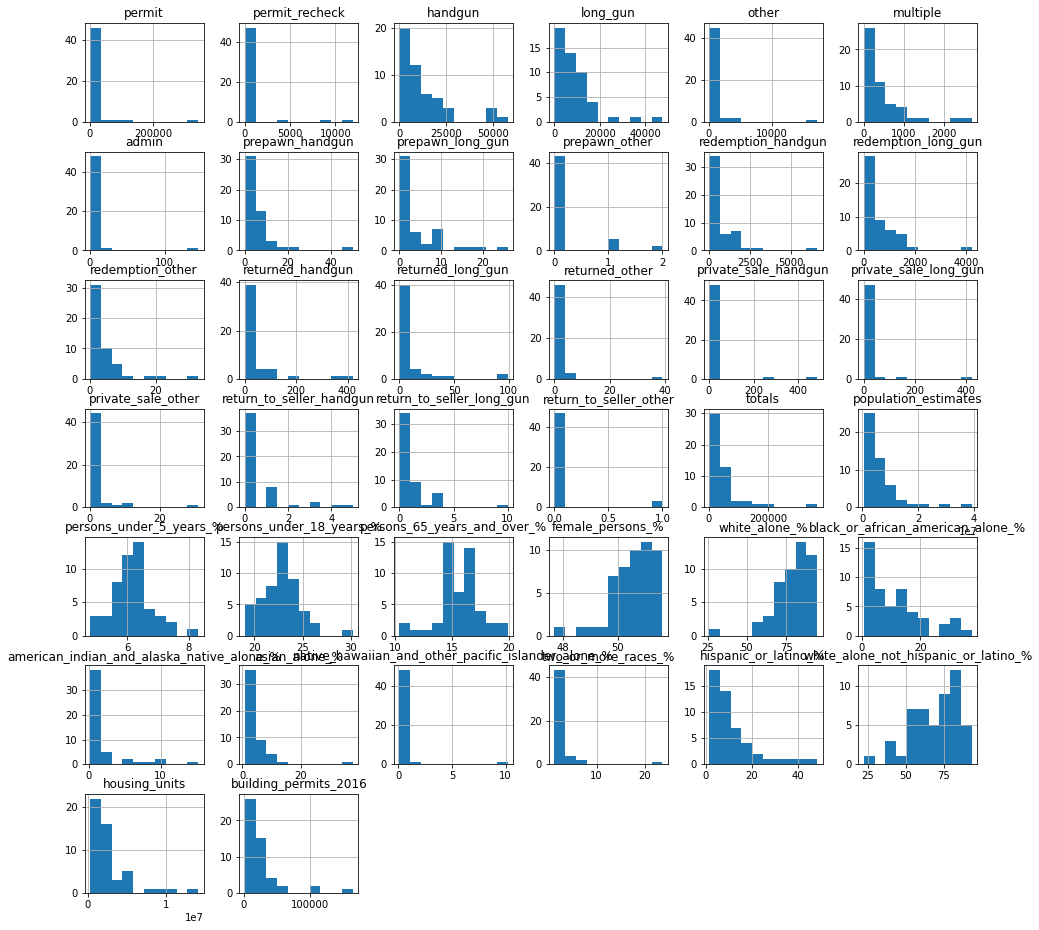

In [481]:
combined_df.hist(figsize=(16,16))

In [482]:
df=combined_df.copy()

In [483]:
#prop is gun registration percentage for each city
df['prop']=100*(df['totals']/df['population_estimates'])

In [484]:
df['permit_per_state_%']=100*(df['permit']/df['totals'])

In [485]:
df['ppl_per_house']=df['population_estimates']/df['housing_units']

In [486]:
df['building_permit_per_population_%']=100*df['building_permits_2016']/df['population_estimates']

In [487]:
df.columns

Index(['state', 'permit', 'permit_recheck', 'handgun', 'long_gun', 'other',
       'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'private_sale_handgun', 'private_sale_long_gun',
       'private_sale_other', 'return_to_seller_handgun',
       'return_to_seller_long_gun', 'return_to_seller_other', 'totals',
       'population_estimates', 'persons_under_5_years_%',
       'persons_under_18_years_%', 'persons_65_years_and_over_%',
       'female_persons_%', 'white_alone_%',
       'black_or_african_american_alone_%',
       'american_indian_and_alaska_native_alone_%', 'asian_alone_%',
       'native_hawaiian_and_other_pacific_islander_alone_%',
       'two_or_more_races_%', 'hispanic_or_latino_%',
       'white_alone_not_hispanic_or_latino_%', 'housing_units',
       'building_permits_2016', 'prop', 'permit_per_state

In [488]:
df=df[['state','prop','permit_per_state_%','ppl_per_house','building_permit_per_population_%','totals','population_estimates','persons_under_5_years_%',
       'persons_under_18_years_%', 'persons_65_years_and_over_%',
       'female_persons_%', 'white_alone_%',
       'black_or_african_american_alone_%',
       'american_indian_and_alaska_native_alone_%', 'asian_alone_%',
       'native_hawaiian_and_other_pacific_islander_alone_%',
       'two_or_more_races_%', 'hispanic_or_latino_%',
       'white_alone_not_hispanic_or_latino_%','building_permits_2016','housing_units']].set_index(df['state'])

In [489]:
df.drop(columns='state',inplace=True)

In [490]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, alabama to wyoming
Data columns (total 20 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   prop                                                50 non-null     float64
 1   permit_per_state_%                                  50 non-null     float64
 2   ppl_per_house                                       50 non-null     float64
 3   building_permit_per_population_%                    50 non-null     float64
 4   totals                                              50 non-null     float64
 5   population_estimates                                50 non-null     float64
 6   persons_under_5_years_%                             50 non-null     float64
 7   persons_under_18_years_%                            50 non-null     float64
 8   persons_65_years_and_over_%                         50 non-null     float64


In [491]:
df.head()

,prop,permit_per_state_%,ppl_per_house,building_permit_per_population_%,totals,population_estimates,persons_under_5_years_%,persons_under_18_years_%,persons_65_years_and_over_%,female_persons_%,white_alone_%,black_or_african_american_alone_%,american_indian_and_alaska_native_alone_%,asian_alone_%,native_hawaiian_and_other_pacific_islander_alone_%,two_or_more_races_%,hispanic_or_latino_%,white_alone_not_hispanic_or_latino_%,building_permits_2016,housing_units
state,,,,,,,,,,,,,,,,,,,,
alabama,1.006045,56.747808,2.180671,0.308453,48927.0,4863300.0,6.0,22.6,16.1,51.6,69.3,26.8,0.7,1.4,0.1,1.6,4.2,65.8,15001.0,2230185.0
alaska,0.915629,3.165023,2.388137,0.202590,6793.0,741894.0,7.3,25.2,10.4,47.7,66.1,3.8,15.2,6.3,1.3,7.3,7.0,61.2,1503.0,310658.0
arizona,0.497701,22.793947,2.340785,0.513312,34496.0,6931071.0,6.3,23.5,16.9,50.3,83.3,4.9,5.4,3.4,0.3,2.8,30.9,55.5,35578.0,2961003.0
arkansas,0.648474,21.240582,2.205737,0.317042,19378.0,2988248.0,6.4,23.6,16.3,50.9,79.4,15.7,1.0,1.6,0.3,2.0,7.3,72.9,9474.0,1354762.0
california,0.484632,40.985606,2.791504,0.260764,190218.0,39250017.0,6.3,23.2,13.6,50.3,72.7,6.5,1.7,14.8,0.5,3.8,38.9,37.7,102350.0,14060525.0


In [492]:
df.sort_values(by='population_estimates',ascending=False).head()

,prop,permit_per_state_%,ppl_per_house,building_permit_per_population_%,totals,population_estimates,persons_under_5_years_%,persons_under_18_years_%,persons_65_years_and_over_%,female_persons_%,white_alone_%,black_or_african_american_alone_%,american_indian_and_alaska_native_alone_%,asian_alone_%,native_hawaiian_and_other_pacific_islander_alone_%,two_or_more_races_%,hispanic_or_latino_%,white_alone_not_hispanic_or_latino_%,building_permits_2016,housing_units
state,,,,,,,,,,,,,,,,,,,,
california,0.484632,40.985606,2.791504,0.260764,190218.0,39250017.0,6.3,23.2,13.6,50.3,72.7,6.5,1.7,14.8,0.5,3.8,38.9,37.7,102350.0,14060525.0
texas,0.456551,19.365287,2.590995,0.595253,127207.0,27862596.0,7.2,26.2,12.0,50.4,79.4,12.6,1.0,4.8,0.1,1.9,39.1,42.6,165853.0,10753629.0
florida,0.607439,22.447447,2.216000,0.563931,125208.0,20612439.0,5.5,20.1,19.9,51.1,77.6,16.8,0.5,2.9,0.1,2.1,24.9,54.9,116240.0,9301642.0
new_york,0.149469,12.665605,2.398693,0.170729,29513.0,19745289.0,5.9,21.2,15.4,51.4,69.9,17.7,1.0,8.9,0.1,2.5,19.0,55.8,33711.0,8231687.0
illinois,1.314115,74.348945,2.403156,0.176565,168227.0,12801539.0,6.0,22.9,14.6,50.9,77.2,14.7,0.6,5.5,0.1,1.9,17.0,61.7,22603.0,5326970.0


In [493]:
df.corr()

,prop,permit_per_state_%,ppl_per_house,building_permit_per_population_%,totals,population_estimates,persons_under_5_years_%,persons_under_18_years_%,persons_65_years_and_over_%,female_persons_%,white_alone_%,black_or_african_american_alone_%,american_indian_and_alaska_native_alone_%,asian_alone_%,native_hawaiian_and_other_pacific_islander_alone_%,two_or_more_races_%,hispanic_or_latino_%,white_alone_not_hispanic_or_latino_%,building_permits_2016,housing_units
prop,1.000000,0.376157,-0.099831,-0.076348,0.771680,-0.077510,0.023493,0.032596,-0.012554,-0.027132,0.169402,-0.052866,-0.032664,-0.175234,-0.098434,-0.113120,-0.176186,0.227508,-0.087462,-0.073967
permit_per_state_%,0.376157,1.000000,0.277350,0.020207,0.428290,0.069583,0.152179,0.161749,-0.074475,0.017354,-0.176825,-0.035421,-0.290901,0.341512,0.382650,0.296412,-0.084241,-0.078156,0.027442,0.069331
ppl_per_house,-0.099831,0.277350,1.000000,0.180163,0.193904,0.448794,0.506855,0.552507,-0.655421,-0.084781,-0.424332,0.073136,-0.028085,0.535517,0.318446,0.355250,0.506082,-0.619642,0.395824,0.403891
building_permit_per_population_%,-0.076348,0.020207,0.180163,1.000000,-0.089008,-0.037585,0.428426,0.425829,-0.203060,-0.214736,0.134218,-0.055554,0.045884,-0.150589,-0.098658,-0.098391,0.129250,0.010675,0.325616,-0.041001
totals,0.771680,0.428290,0.193904,-0.089008,1.000000,0.528661,0.002898,0.038177,-0.099199,0.143042,0.023937,0.095036,-0.207725,-0.001935,-0.119063,-0.127643,0.173972,-0.101669,0.435272,0.532304
population_estimates,-0.077510,0.069583,0.448794,-0.037585,0.528661,1.000000,-0.000040,0.028916,-0.185680,0.224346,-0.171441,0.208184,-0.216563,0.216183,-0.110570,-0.092148,0.533321,-0.462279,0.844697,0.993921
persons_under_5_years_%,0.023493,0.152179,0.506855,0.428426,0.002898,-0.000040,1.000000,0.933638,-0.728141,-0.554454,-0.107755,-0.077207,0.414860,0.025994,0.101859,0.146913,0.131939,-0.171247,0.118944,-0.032358
persons_under_18_years_%,0.032596,0.161749,0.552507,0.425829,0.038177,0.028916,0.933638,1.000000,-0.765433,-0.406481,-0.027480,-0.001007,0.314803,-0.101992,-0.036911,-0.011467,0.191972,-0.153302,0.150088,-0.003099
persons_65_years_and_over_%,-0.012554,-0.074475,-0.655421,-0.203060,-0.099199,-0.185680,-0.728141,-0.765433,1.000000,0.391080,0.170049,-0.089051,-0.264859,-0.066660,0.048380,-0.025919,-0.210567,0.264168,-0.210323,-0.140977
female_persons_%,-0.027132,0.017354,-0.084781,-0.214736,0.143042,0.224346,-0.554454,-0.406481,0.391080,1.000000,-0.221465,0.671899,-0.615896,-0.103885,-0.227013,-0.295817,-0.044265,-0.146428,0.136346,0.261608


### A correlation matrix in order to explore much more the correlation between reasonable variables

In [494]:
corr=df.corr()
corr.style.background_gradient(cmap='coolwarm')

,prop,permit_per_state_%,ppl_per_house,building_permit_per_population_%,totals,population_estimates,persons_under_5_years_%,persons_under_18_years_%,persons_65_years_and_over_%,female_persons_%,white_alone_%,black_or_african_american_alone_%,american_indian_and_alaska_native_alone_%,asian_alone_%,native_hawaiian_and_other_pacific_islander_alone_%,two_or_more_races_%,hispanic_or_latino_%,white_alone_not_hispanic_or_latino_%,building_permits_2016,housing_units
prop,1.000000,0.376157,-0.099831,-0.076348,0.771680,-0.077510,0.023493,0.032596,-0.012554,-0.027132,0.169402,-0.052866,-0.032664,-0.175234,-0.098434,-0.113120,-0.176186,0.227508,-0.087462,-0.073967
permit_per_state_%,0.376157,1.000000,0.277350,0.020207,0.428290,0.069583,0.152179,0.161749,-0.074475,0.017354,-0.176825,-0.035421,-0.290901,0.341512,0.382650,0.296412,-0.084241,-0.078156,0.027442,0.069331
ppl_per_house,-0.099831,0.277350,1.000000,0.180163,0.193904,0.448794,0.506855,0.552507,-0.655421,-0.084781,-0.424332,0.073136,-0.028085,0.535517,0.318446,0.355250,0.506082,-0.619642,0.395824,0.403891
building_permit_per_population_%,-0.076348,0.020207,0.180163,1.000000,-0.089008,-0.037585,0.428426,0.425829,-0.203060,-0.214736,0.134218,-0.055554,0.045884,-0.150589,-0.098658,-0.098391,0.129250,0.010675,0.325616,-0.041001
totals,0.771680,0.428290,0.193904,-0.089008,1.000000,0.528661,0.002898,0.038177,-0.099199,0.143042,0.023937,0.095036,-0.207725,-0.001935,-0.119063,-0.127643,0.173972,-0.101669,0.435272,0.532304
population_estimates,-0.077510,0.069583,0.448794,-0.037585,0.528661,1.000000,-0.000040,0.028916,-0.185680,0.224346,-0.171441,0.208184,-0.216563,0.216183,-0.110570,-0.092148,0.533321,-0.462279,0.844697,0.993921
persons_under_5_years_%,0.023493,0.152179,0.506855,0.428426,0.002898,-0.000040,1.000000,0.933638,-0.728141,-0.554454,-0.107755,-0.077207,0.414860,0.025994,0.101859,0.146913,0.131939,-0.171247,0.118944,-0.032358
persons_under_18_years_%,0.032596,0.161749,0.552507,0.425829,0.038177,0.028916,0.933638,1.000000,-0.765433,-0.406481,-0.027480,-0.001007,0.314803,-0.101992,-0.036911,-0.011467,0.191972,-0.153302,0.150088,-0.003099
persons_65_years_and_over_%,-0.012554,-0.074475,-0.655421,-0.203060,-0.099199,-0.185680,-0.728141,-0.765433,1.000000,0.391080,0.170049,-0.089051,-0.264859,-0.066660,0.048380,-0.025919,-0.210567,0.264168,-0.210323,-0.140977
female_persons_%,-0.027132,0.017354,-0.084781,-0.214736,0.143042,0.224346,-0.554454,-0.406481,0.391080,1.000000,-0.221465,0.671899,-0.615896,-0.103885,-0.227013,-0.295817,-0.044265,-0.146428,0.136346,0.261608


In [495]:
df.sort_values(by='ppl_per_house',ascending=False).head()

,prop,permit_per_state_%,ppl_per_house,building_permit_per_population_%,totals,population_estimates,persons_under_5_years_%,persons_under_18_years_%,persons_65_years_and_over_%,female_persons_%,white_alone_%,black_or_african_american_alone_%,american_indian_and_alaska_native_alone_%,asian_alone_%,native_hawaiian_and_other_pacific_islander_alone_%,two_or_more_races_%,hispanic_or_latino_%,white_alone_not_hispanic_or_latino_%,building_permits_2016,housing_units
state,,,,,,,,,,,,,,,,,,,,
utah,0.577081,55.395275,2.894442,0.742720,17608.0,3051217.0,8.3,30.2,10.5,49.7,91.1,1.4,1.6,2.5,1.0,2.5,13.8,78.8,22662.0,1054164.0
california,0.484632,40.985606,2.791504,0.260764,190218.0,39250017.0,6.3,23.2,13.6,50.3,72.7,6.5,1.7,14.8,0.5,3.8,38.9,37.7,102350.0,14060525.0
hawaii,0.109551,99.872204,2.659690,0.235832,1565.0,1428557.0,6.4,21.6,17.1,49.8,25.8,2.2,0.4,37.7,10.2,23.7,10.4,22.1,3369.0,537114.0
texas,0.456551,19.365287,2.590995,0.595253,127207.0,27862596.0,7.2,26.2,12.0,50.4,79.4,12.6,1.0,4.8,0.1,1.9,39.1,42.6,165853.0,10753629.0
new_jersey,0.112628,0.000000,2.481536,0.299548,10074.0,8944469.0,5.8,22.2,15.3,51.2,72.4,15.0,0.6,9.8,0.1,2.2,20.0,55.8,26793.0,3604409.0


In [496]:
df.sort_values(by='totals',ascending=False).head()

,prop,permit_per_state_%,ppl_per_house,building_permit_per_population_%,totals,population_estimates,persons_under_5_years_%,persons_under_18_years_%,persons_65_years_and_over_%,female_persons_%,white_alone_%,black_or_african_american_alone_%,american_indian_and_alaska_native_alone_%,asian_alone_%,native_hawaiian_and_other_pacific_islander_alone_%,two_or_more_races_%,hispanic_or_latino_%,white_alone_not_hispanic_or_latino_%,building_permits_2016,housing_units
state,,,,,,,,,,,,,,,,,,,,
kentucky,8.183167,94.429128,2.257363,0.286547,363085.0,4436974.0,6.2,22.8,15.6,50.7,88.0,8.3,0.3,1.5,0.1,1.9,3.5,85.0,12714.0,1965556.0
california,0.484632,40.985606,2.791504,0.260764,190218.0,39250017.0,6.3,23.2,13.6,50.3,72.7,6.5,1.7,14.8,0.5,3.8,38.9,37.7,102350.0,14060525.0
illinois,1.314115,74.348945,2.403156,0.176565,168227.0,12801539.0,6.0,22.9,14.6,50.9,77.2,14.7,0.6,5.5,0.1,1.9,17.0,61.7,22603.0,5326970.0
texas,0.456551,19.365287,2.590995,0.595253,127207.0,27862596.0,7.2,26.2,12.0,50.4,79.4,12.6,1.0,4.8,0.1,1.9,39.1,42.6,165853.0,10753629.0
florida,0.607439,22.447447,2.216000,0.563931,125208.0,20612439.0,5.5,20.1,19.9,51.1,77.6,16.8,0.5,2.9,0.1,2.1,24.9,54.9,116240.0,9301642.0


In [497]:
df.sort_values(by='building_permit_per_population_%',ascending=False).head()

,prop,permit_per_state_%,ppl_per_house,building_permit_per_population_%,totals,population_estimates,persons_under_5_years_%,persons_under_18_years_%,persons_65_years_and_over_%,female_persons_%,white_alone_%,black_or_african_american_alone_%,american_indian_and_alaska_native_alone_%,asian_alone_%,native_hawaiian_and_other_pacific_islander_alone_%,two_or_more_races_%,hispanic_or_latino_%,white_alone_not_hispanic_or_latino_%,building_permits_2016,housing_units
state,,,,,,,,,,,,,,,,,,,,
utah,0.577081,55.395275,2.894442,0.742720,17608.0,3051217.0,8.3,30.2,10.5,49.7,91.1,1.4,1.6,2.5,1.0,2.5,13.8,78.8,22662.0,1054164.0
idaho,0.722103,29.669245,2.401655,0.722756,12154.0,1683140.0,6.8,26.0,15.1,49.9,93.3,0.8,1.8,1.5,0.2,2.4,12.3,82.4,12165.0,700825.0
colorado,0.777794,14.786281,2.368647,0.703433,43094.0,5540545.0,6.1,22.8,13.4,49.7,87.5,4.5,1.6,3.3,0.2,3.0,21.3,68.6,38974.0,2339118.0
south_dakota,0.855736,15.919525,2.254738,0.656996,7406.0,865454.0,7.1,24.6,16.0,49.6,85.2,2.0,9.0,1.5,0.1,2.3,3.7,82.5,5686.0,383838.0
south_carolina,0.659730,42.850596,2.218596,0.648342,32730.0,4961119.0,5.9,22.1,16.7,51.5,68.5,27.5,0.5,1.6,0.1,1.8,5.5,63.9,32165.0,2236153.0


In [498]:
df.sort_values(by='permit_per_state_%',ascending=False).head()

,prop,permit_per_state_%,ppl_per_house,building_permit_per_population_%,totals,population_estimates,persons_under_5_years_%,persons_under_18_years_%,persons_65_years_and_over_%,female_persons_%,white_alone_%,black_or_african_american_alone_%,american_indian_and_alaska_native_alone_%,asian_alone_%,native_hawaiian_and_other_pacific_islander_alone_%,two_or_more_races_%,hispanic_or_latino_%,white_alone_not_hispanic_or_latino_%,building_permits_2016,housing_units
state,,,,,,,,,,,,,,,,,,,,
hawaii,0.109551,99.872204,2.659690,0.235832,1565.0,1428557.0,6.4,21.6,17.1,49.8,25.8,2.2,0.4,37.7,10.2,23.7,10.4,22.1,3369.0,537114.0
kentucky,8.183167,94.429128,2.257363,0.286547,363085.0,4436974.0,6.2,22.8,15.6,50.7,88.0,8.3,0.3,1.5,0.1,1.9,3.5,85.0,12714.0,1965556.0
iowa,0.380803,78.671358,2.271250,0.456727,11937.0,3134693.0,6.4,23.3,16.4,50.3,91.4,3.7,0.5,2.5,0.1,1.8,5.8,86.2,14317.0,1380162.0
illinois,1.314115,74.348945,2.403156,0.176565,168227.0,12801539.0,6.0,22.9,14.6,50.9,77.2,14.7,0.6,5.5,0.1,1.9,17.0,61.7,22603.0,5326970.0
nebraska,0.284671,66.844723,2.305630,0.423572,5429.0,1907116.0,7.0,24.8,15.0,50.2,88.9,5.0,1.4,2.5,0.1,2.1,10.7,79.6,8078.0,827156.0


### Research Question 1 Which states have had the highest growth in gun registrations?


> **As the data manual says the most appropriate data to take into account is the 2016 data and this is what will be visualized**

In [499]:
df=combined_df.copy()

In [500]:
df[['totals','state','population_estimates']].sort_values(by='totals',ascending=False).head()

,totals,state,population_estimates
16,363085.0,kentucky,4436974.0
4,190218.0,california,39250017.0
12,168227.0,illinois,12801539.0
42,127207.0,texas,27862596.0
8,125208.0,florida,20612439.0


In [501]:
rq2=pd.DataFrame()

> **Now a new column will be insterted which describe the proportion of each state for the gun trending**

In [502]:
rq2['prop']=100*(df['totals']/df['population_estimates'])
rq2['state']=df['state']

In [509]:
rq22=rq2.sort_values(by='prop',ascending=False).head(10)

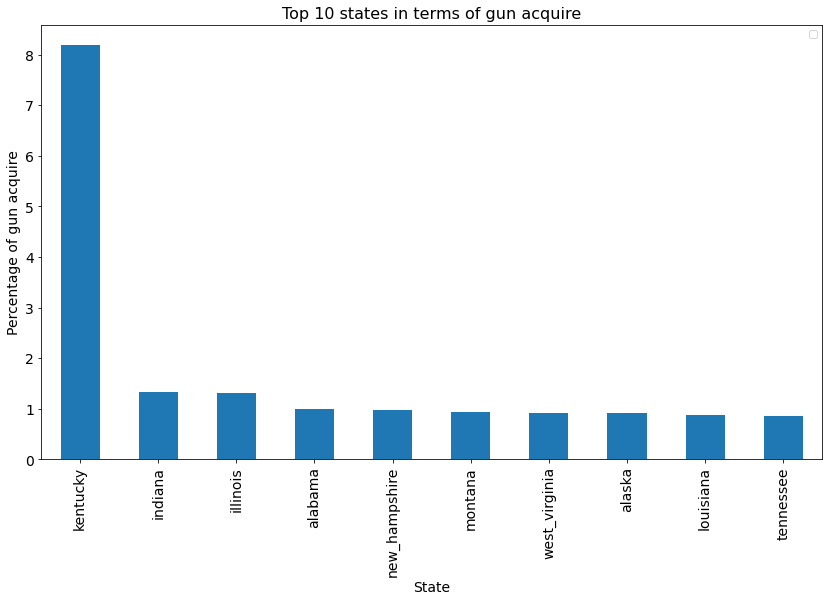

In [510]:
rq22.set_index(rq22['state']).plot(kind='bar',figsize=(14,8),fontsize=14)
plt.ylabel('Percentage of gun acquire',fontsize=14)
plt.xlabel('State',fontsize=14)
plt.title("Top 10 states in terms of gun acquire",fontsize=16)
plt.legend('')
#ax.yaxis.set_label_coords(-0.1,1.02)

### -Comment: This bar plot shows the percentage of the top 10 states in term of gun acquired by individuals. Obviousely, it shows that Kentucky is the highest one with 8% and (Indiana,Illiniois,Alabama,New Hamphire,Montana,West Virginia,Alaska,Louisiana and Tennessee) are having around 1% of the population holding gun.

> **In terms of gun permits ?**

In [167]:
df['permit_per_state_%']=100*(df['permit']/df['totals'])

In [168]:
rq=pd.DataFrame()

In [169]:
rq['permit_per_state_%']=100*(df['permit']/df['totals'])
rq['state']=df['state']

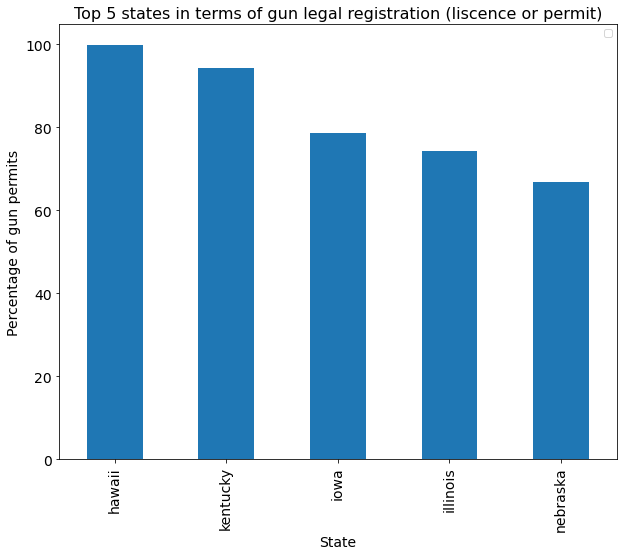

In [170]:
rq.set_index(rq['state']).sort_values(by='permit_per_state_%',ascending=False).head().plot(kind='bar',figsize=(10,8),fontsize=14)
plt.ylabel('Percentage of gun permits',fontsize=14)
plt.xlabel('State',fontsize=14)
plt.title("Top 5 states in terms of gun legal registration (liscence or permit)",fontsize=16)
plt.legend('')

### -Comment: This bar plot shows the percentage of the top 5 states in term of gun permit or liscensed firearm owned by individuals. It is clear that, (Hawaii,Kentucky,Iowa,Illinois and Nebraska) respectively, have the most legal firearms owned by individuals (Gun Registration according to US gov.).

### Research Question 2 What is the overall trend of gun purchases?

In [171]:
df3=combined_df.copy()

In [172]:
df3.columns

Index(['state', 'permit', 'permit_recheck', 'handgun', 'long_gun', 'other',
       'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'private_sale_handgun', 'private_sale_long_gun',
       'private_sale_other', 'return_to_seller_handgun',
       'return_to_seller_long_gun', 'return_to_seller_other', 'totals',
       'population_estimates', 'persons_under_5_years_%',
       'persons_under_18_years_%', 'persons_65_years_and_over_%',
       'female_persons_%', 'white_alone_%',
       'black_or_african_american_alone_%',
       'american_indian_and_alaska_native_alone_%', 'asian_alone_%',
       'native_hawaiian_and_other_pacific_islander_alone_%',
       'two_or_more_races_%', 'hispanic_or_latino_%',
       'white_alone_not_hispanic_or_latino_%', 'housing_units',
       'building_permits_2016'],
      dtype='object')

In [173]:
df3[df3.handgun==df3.handgun.max()]

,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,...,white_alone_%,black_or_african_american_alone_%,american_indian_and_alaska_native_alone_%,asian_alone_%,native_hawaiian_and_other_pacific_islander_alone_%,two_or_more_races_%,hispanic_or_latino_%,white_alone_not_hispanic_or_latino_%,housing_units,building_permits_2016
8,florida,28106.0,0.0,57902.0,28000.0,4504.0,2324.0,12.0,8.0,2.0,...,77.6,16.8,0.5,2.9,0.1,2.1,24.9,54.9,9301642.0,116240.0


In [174]:
df3[df3.long_gun==df3.long_gun.max()]

,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,...,white_alone_%,black_or_african_american_alone_%,american_indian_and_alaska_native_alone_%,asian_alone_%,native_hawaiian_and_other_pacific_islander_alone_%,two_or_more_races_%,hispanic_or_latino_%,white_alone_not_hispanic_or_latino_%,housing_units,building_permits_2016
4,california,77962.0,0.0,46361.0,47594.0,17297.0,0.0,0.0,0.0,0.0,...,72.7,6.5,1.7,14.8,0.5,3.8,38.9,37.7,14060525.0,102350.0


In [175]:
df3[df3.other==df3.other.max()]

,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,...,white_alone_%,black_or_african_american_alone_%,american_indian_and_alaska_native_alone_%,asian_alone_%,native_hawaiian_and_other_pacific_islander_alone_%,two_or_more_races_%,hispanic_or_latino_%,white_alone_not_hispanic_or_latino_%,housing_units,building_permits_2016
4,california,77962.0,0.0,46361.0,47594.0,17297.0,0.0,0.0,0.0,0.0,...,72.7,6.5,1.7,14.8,0.5,3.8,38.9,37.7,14060525.0,102350.0


In [176]:
df3[df3.permit==df3.permit.max()]

,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,...,white_alone_%,black_or_african_american_alone_%,american_indian_and_alaska_native_alone_%,asian_alone_%,native_hawaiian_and_other_pacific_islander_alone_%,two_or_more_races_%,hispanic_or_latino_%,white_alone_not_hispanic_or_latino_%,housing_units,building_permits_2016
16,kentucky,342858.0,0.0,9378.0,6615.0,321.0,534.0,0.0,7.0,18.0,...,88.0,8.3,0.3,1.5,0.1,1.9,3.5,85.0,1965556.0,12714.0


In [177]:
df3['permit_per_state_%']=100*df3['permit']/df3['totals']

In [178]:
df3[['permit_per_state_%','totals','population_estimates','state']].sort_values(by='permit_per_state_%',ascending=False).head()

,permit_per_state_%,totals,population_estimates,state
10,99.872204,1565.0,1428557.0,hawaii
16,94.429128,363085.0,4436974.0,kentucky
14,78.671358,11937.0,3134693.0,iowa
12,74.348945,168227.0,12801539.0,illinois
26,66.844723,5429.0,1907116.0,nebraska


In [179]:
df3.iloc[:,1:].sum()

permit                                                9.505720e+05
permit_recheck                                        2.580600e+04
handgun                                               6.275150e+05
long_gun                                              4.400510e+05
other                                                 5.328700e+04
multiple                                              2.139000e+04
admin                                                 2.300000e+02
prepawn_handgun                                       2.170000e+02
prepawn_long_gun                                      1.940000e+02
prepawn_other                                         9.000000e+00
redemption_handgun                                    3.368500e+04
redemption_long_gun                                   2.775500e+04
redemption_other                                      1.790000e+02
returned_handgun                                      1.901000e+03
returned_long_gun                                     4.290000

Text(0.5, 1.0, 'Percentage of having a handgun, long gun or other in all states')

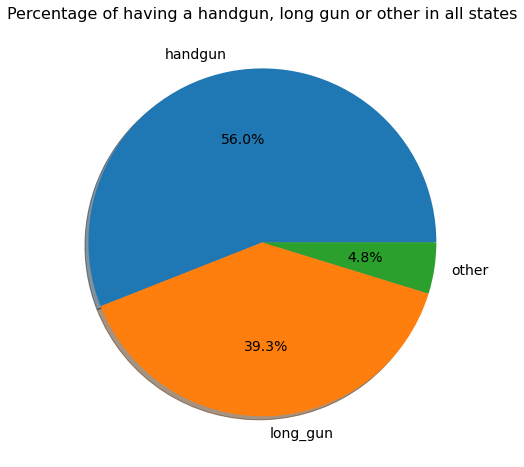

In [180]:
#more generally, firearm is the trend
df3.iloc[:,1:].mean()[['handgun','long_gun','other']].\
plot(kind="pie",label="",figsize=(8,8),fontsize=14,subplots=True, shadow = True,autopct='%1.1f%%')
plt.title("Percentage of having a handgun, long gun or other in all states",fontsize=16)

### -Comment: This pie chart shows that the majority of the people who have a firearm, own a handgun. Therefore, it is the trend as it superpasses the long gun percentage and other (such as crossbow, minigun or etc).

<a id='conclusions'></a>
## Conclusions

> In this report, there are 2 dataframes to be used, the first is the census data which contains population estimation for each state of US, races, housing etc. The second contains data about the firearms in each state. Gathering, assessing and cleaning are all done to get a clean data. Firstly, gathering and collecting data. Secondly, assessing and exploring data by its quality issues and tidiness issues (mentioned in observations section). In the end, the combined dataframe is used to answer some questions about the data visually such as 'Which states have had the highest growth in gun registrations?','What is the overall trend of gun purchases?'.\
Statistically, Kentucky has the highest legal or unlegal gun acquirement percentage among the states with a value of 8% per population and Hawaii which is much less smaller in population has the hoghest legal (permit) gun registration with 99%.
Also, Buying hand gun is more likely to happen with 56%.\
However, there are some limitations in this work such as using only 2016 data, neglecting all of the rows in census data that are not in 2016 which did not show any rate of change in time.


### References

>**N/A**